# Coupled Model

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [9]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)
from IPython.display import Latex

In [10]:
import os
import matplotlib.pyplot as plt

In [11]:
from src.configs.load_config import load_config

In [12]:
from src.models.model_setup import ModelSetup
from src.constants import TEST_DIREC

In [13]:
cfg = load_config(test=False)
setup = ModelSetup(str(TEST_DIREC))

In [20]:
from src.models.ocean import Ocean
from src.models.atmos import Atmos
from src.models.coupling import Coupling

[autoreload of src.models.atmos failed: Traceback (most recent call last):
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/users/sithom/seager19/env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 266, in up

In [15]:
os.listdir(setup.ocean_data_path)

['dQdf-sample.nc',
 'dQdT-sample.nc',
 'om_mask.nc',
 'qflx-0.nc',
 'qflx.nc',
 'qflx-test.nc',
 'rzk.pro',
 'spline_ECMWF.txt',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'tau-ECMWF.x',
 'tau-ECMWF.y']

In [16]:
os.listdir(setup.ocean_output_path)

['om_diag.nc',
 'om_test.save',
 'om_spin.save',
 'om_spin.nc',
 'om_spin.20y.restart',
 'om_diag.save',
 'om_diag.2y.restart',
 'om_run2f.save',
 'om_run2f.nc']

. For coupling, the drag coefficient, cD—used to convert modelled winds into stresses to force the ocean component—is 2.25 × 10−3, which is about 50% larger than typical values, but was found necessary for a coupled response with approximately the observed amplitude.

In [17]:
os.listdir(setup.atmos_path)

['DATA',
 'tmp',
 'prTrend.png',
 'S90-H2000-Stab.eps',
 'S91-hq1800-prcp_land1.nc',
 'Q.nc',
 'dQ.nc',
 'Tsp4.eps']

In [18]:
os.listdir(setup.atmos_data_path)

['clt-ECMWF-clim60.nc',
 'mask-360x180.nc',
 'mask-360x181.nc',
 'pr-ECMWF-clim.nc',
 'pr-ECMWF-trend.nc',
 'ps-ECMWF-clim.nc',
 'rh-ECMWF-clim60.nc',
 'rh-fixed-clim60.nc',
 'sfcWind-ECMWF-clim60.nc',
 'sfcWind-ECMWF-clim.nc',
 'sst-ECMWF-clim.nc',
 'sst-ECMWF-trend.nc',
 'ts-ECMWF-clim60.nc',
 'ts-ECMWF-clim.nc',
 'ts-ECMWF-trend.nc']

editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_spin
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_diag
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_run2f
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_test 2.05038 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_spin -t om_spin.tios 369.81722 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_spin 3.52922 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
rm -rf output/om_spin.data output/om_spin.indx 0.09400 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
cp -f output/om_spin.save output/om_spin.20y.restart 0.03741 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_diag -t om_diag.tios 56.40740 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_diag 0.

/home/users/sithom/seager19/src/test/test_direc/om_diag_SST_SST.gif:   0%|          | 0/24 [00:00<?, ?it/s]

0
1
2
3
4
SST_SST


/home/users/sithom/seager19/src/test/test_direc/om_diag_SST_SST.gif: 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]
/home/users/sithom/seager19/src/test/test_direc/om_diag_SST_QFLX.gif:   0%|          | 0/24 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_SST_SST.gif made.
'animate_xr_da'  8.90541 s 

SST_QFLX


/home/users/sithom/seager19/src/test/test_direc/om_diag_SST_QFLX.gif: 100%|██████████| 24/24 [00:06<00:00,  3.83it/s]
/home/users/sithom/seager19/src/test/test_direc/om_diag_DYN_PRES.gif:   0%|          | 0/24 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_SST_QFLX.gif made.
'animate_xr_da'  8.90831 s 

DYN_PRES


/home/users/sithom/seager19/src/test/test_direc/om_diag_DYN_PRES.gif: 100%|██████████| 24/24 [00:06<00:00,  3.68it/s]
/home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_HMODEL.gif:   0%|          | 0/24 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_DYN_PRES.gif made.
'animate_xr_da'  9.54524 s 

TDEEP_HMODEL


/home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_HMODEL.gif: 100%|██████████| 24/24 [00:06<00:00,  3.76it/s]
/home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_TDEEP.gif:   0%|          | 0/24 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_HMODEL.gif made.
'animate_xr_da'  8.98703 s 

TDEEP_TDEEP


/home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_TDEEP.gif: 100%|██████████| 24/24 [00:06<00:00,  3.58it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_DYN_PRES.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_diag_TDEEP_TDEEP.gif made.
'animate_xr_da'  9.22830 s 

'animate_ds'  45.77505 s 

DYN_PRES


/home/users/sithom/seager19/src/test/test_direc/om_run2f_DYN_PRES.gif: 100%|██████████| 25/25 [00:07<00:00,  3.50it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HTHERM.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_DYN_PRES.gif made.
'animate_xr_da'  10.35865 s 

TDEEP_HTHERM


/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HTHERM.gif: 100%|██████████| 25/25 [00:06<00:00,  3.84it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_TDEEP.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HTHERM.gif made.
'animate_xr_da'  9.12712 s 

TDEEP_TDEEP


/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_TDEEP.gif: 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HMODEL.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_TDEEP.gif made.
'animate_xr_da'  10.14934 s 

TDEEP_HMODEL


/home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HMODEL.gif: 100%|██████████| 25/25 [00:06<00:00,  3.85it/s]
/home/users/sithom/seager19/src/test/test_direc/om_run2f_SST_SST.gif:   0%|          | 0/25 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_TDEEP_HMODEL.gif made.
'animate_xr_da'  9.13950 s 

SST_SST


/home/users/sithom/seager19/src/test/test_direc/om_run2f_SST_SST.gif: 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]
/home/users/sithom/seager19/src/test/test_direc/qflx-diff.gif:   0%|          | 0/12 [00:00<?, ?it/s]

Video /home/users/sithom/seager19/src/test/test_direc/om_run2f_SST_SST.gif made.
'animate_xr_da'  10.36424 s 

'animate_ds'  49.34844 s 



/home/users/sithom/seager19/src/test/test_direc/qflx-diff.gif: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]


Video /home/users/sithom/seager19/src/test/test_direc/qflx-diff.gif made.
'animate_qflx_diff'  11.23422 s 

'animate_all'  01 min 46 s 



<Figure size 826.772x510.973 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

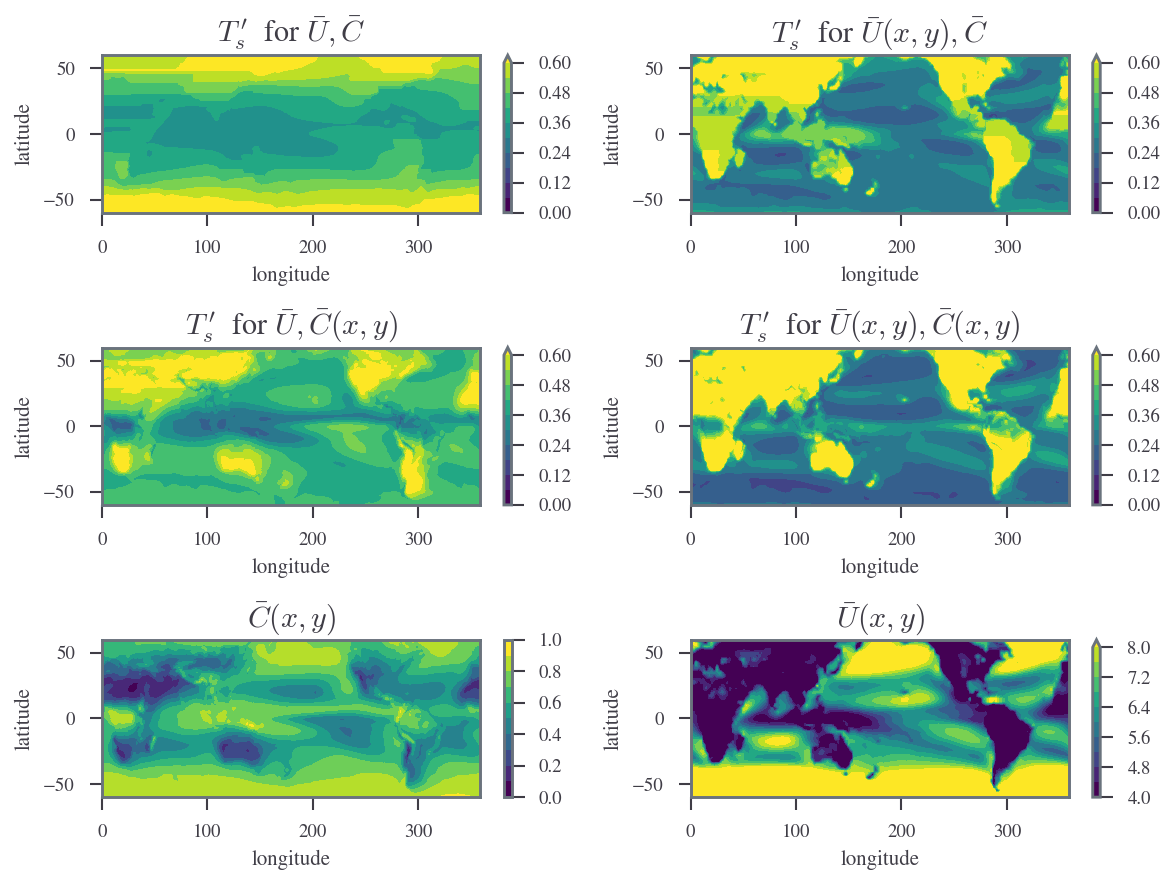

In [21]:
coup = Coupling(cfg, setup)
coup.run()

In [64]:
import os
import xarray as xr
from src.xr_utils import open_dataset, open_dataarray, sel, can_coords
from src.plot_utils import add_units

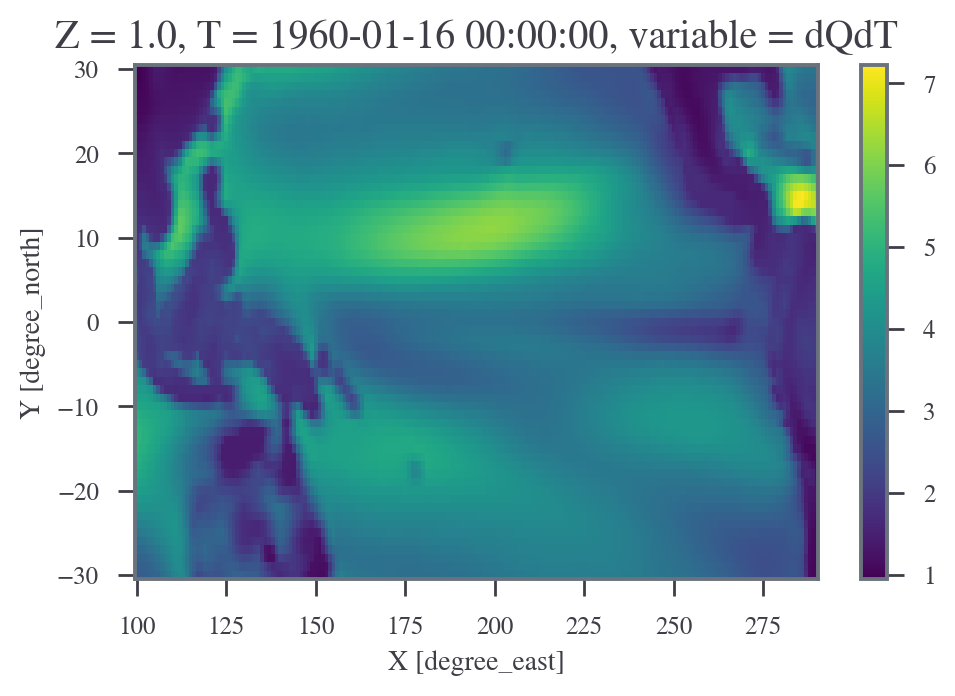

In [34]:
sel(open_dataarray(os.path.join(setup.ocean_data_path, "dQdT-sample.nc"))).isel(T=0).plot()

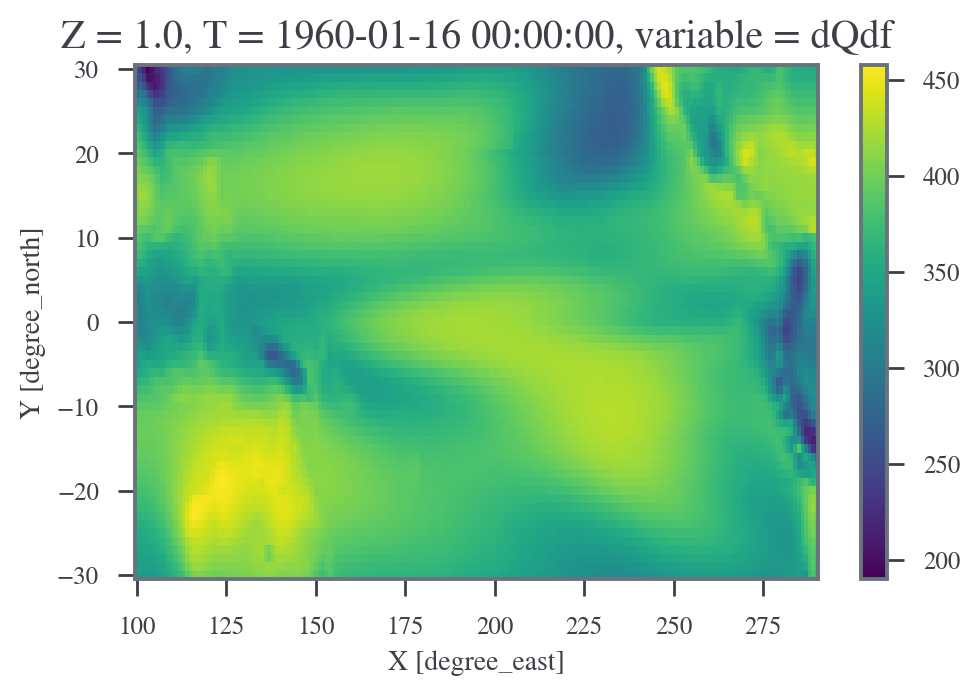

In [35]:
sel(open_dataarray(os.path.join(setup.ocean_data_path, "dQdf-sample.nc")).isel(T=0)).plot()

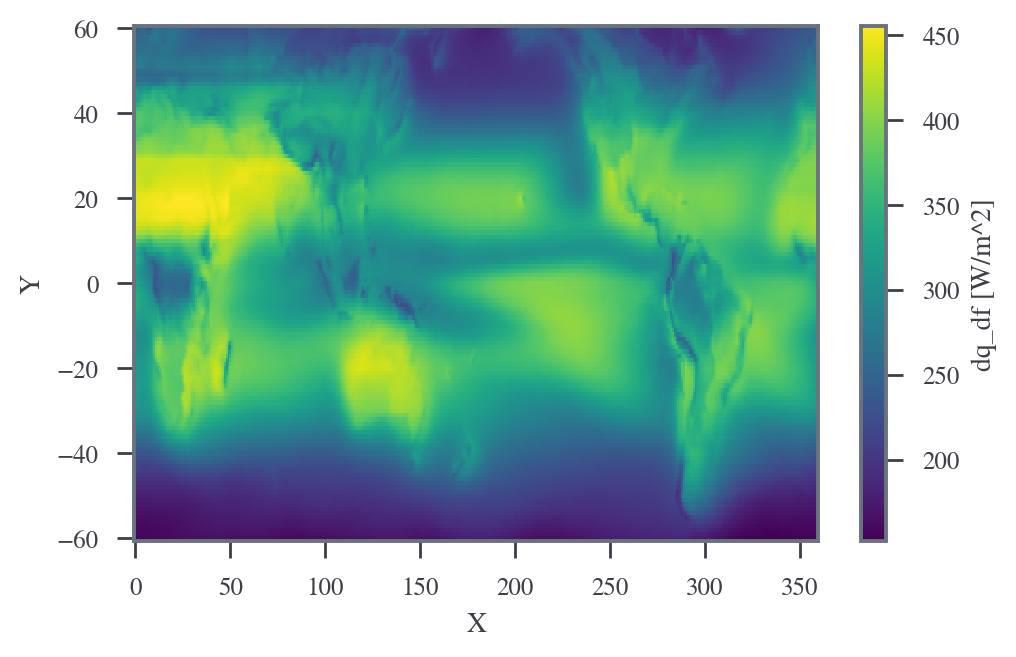

In [48]:
can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_df.plot()

In [39]:
xr.open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    dq_dt    (lat, lon) float32 ...
    dq_df    (lat, lon) float32 ...
    ALH      (lat, lon) float32 ...
    ALW      (lat, lon) float32 ...
    BLW      (lat, lon) float32 ...
    dTse     (lat, lon) float32 ...
    rh       (lat, lon) float32 ...
    Ub       (lat, lon) float32 ...
    Cb       (lat, lon) float32 ...
    Tsb      (lat, lon) float32 ...

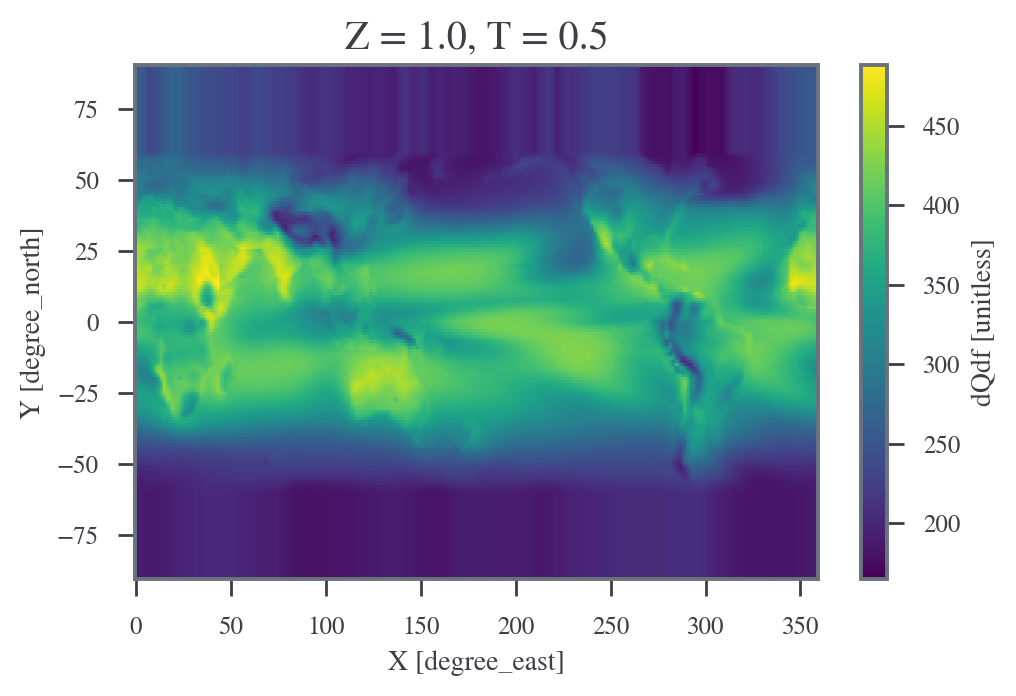

In [51]:
xr.open_dataarray(os.path.join(setup.ocean_data_path, "dQdf-sample.nc"), decode_times=False).isel(T=0).plot()

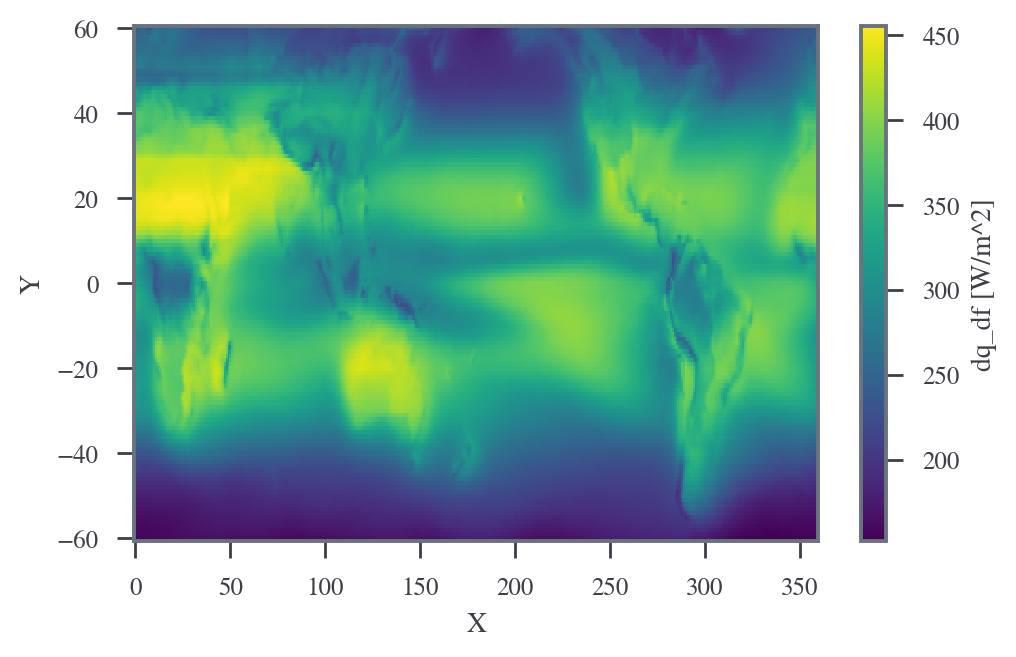

In [52]:
can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_df.plot()

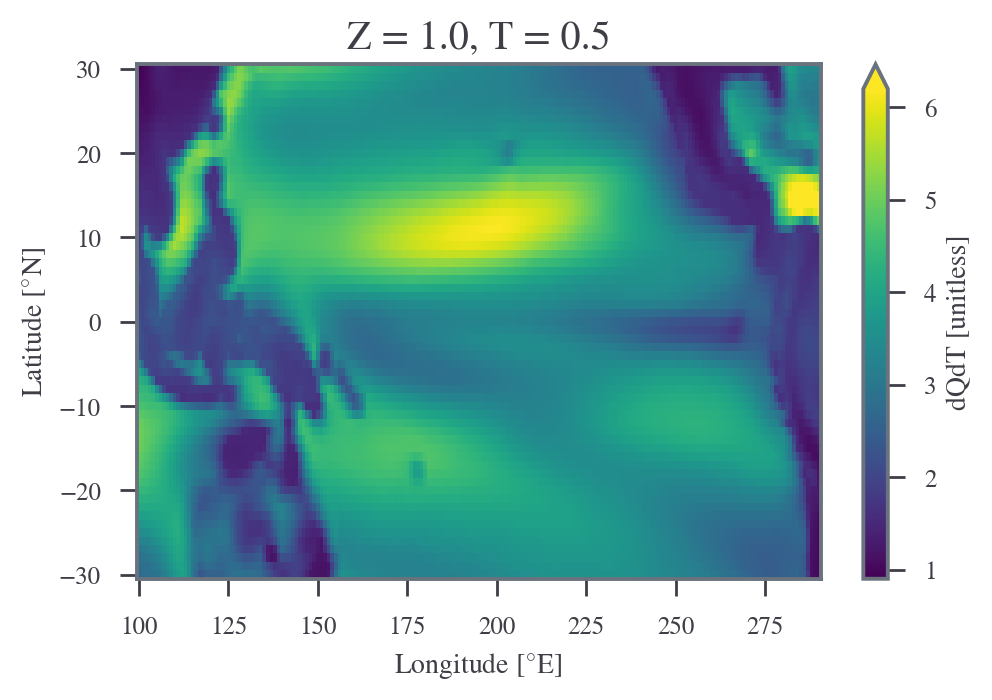

In [67]:
add_units(sel(xr.open_dataarray(
    os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
))).isel(T=0, Z=0).plot(vmin=0.9, vmax=6.2)

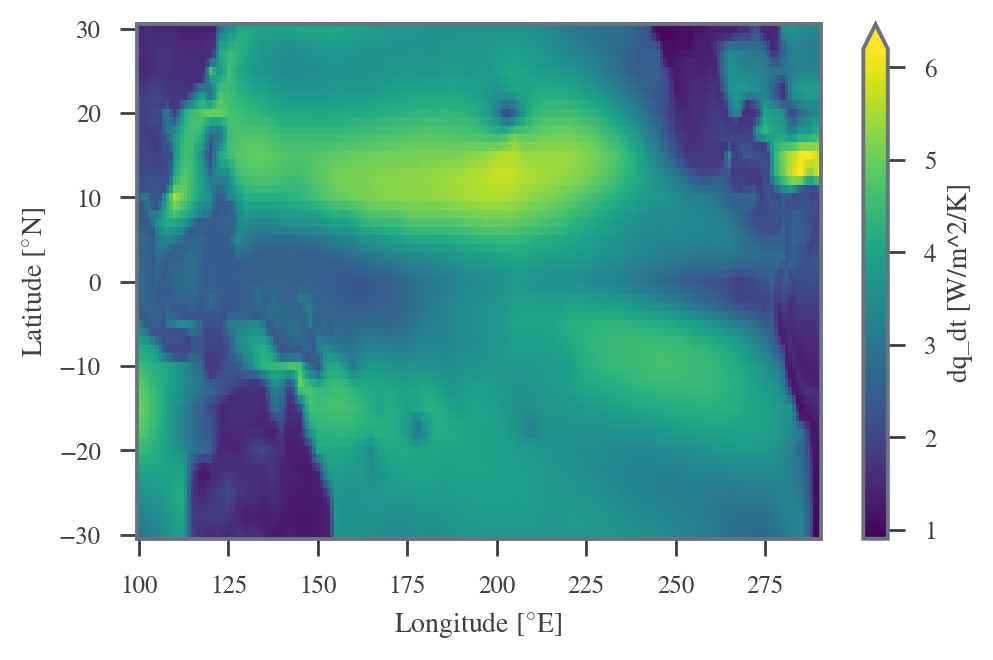

In [66]:
add_units(sel(can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_dt)).plot(
    vmin=0.9, vmax=6.2
)

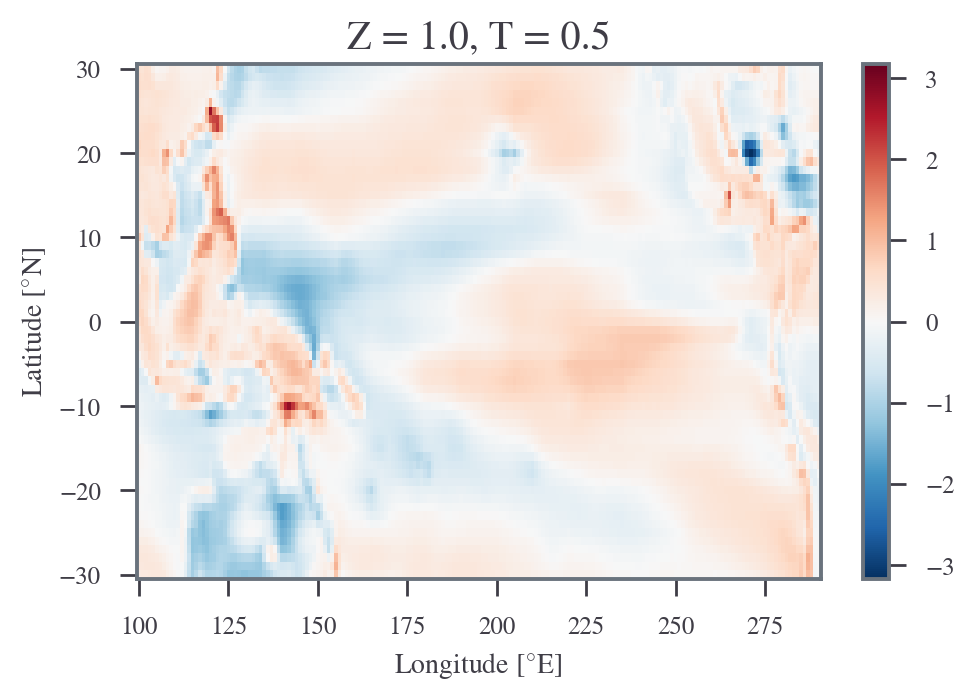

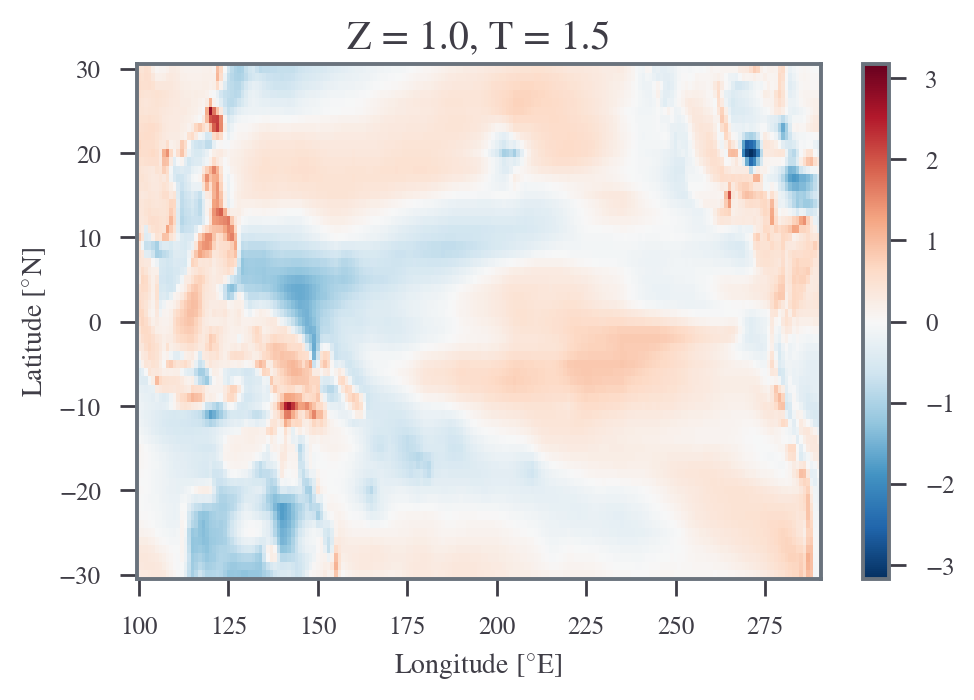

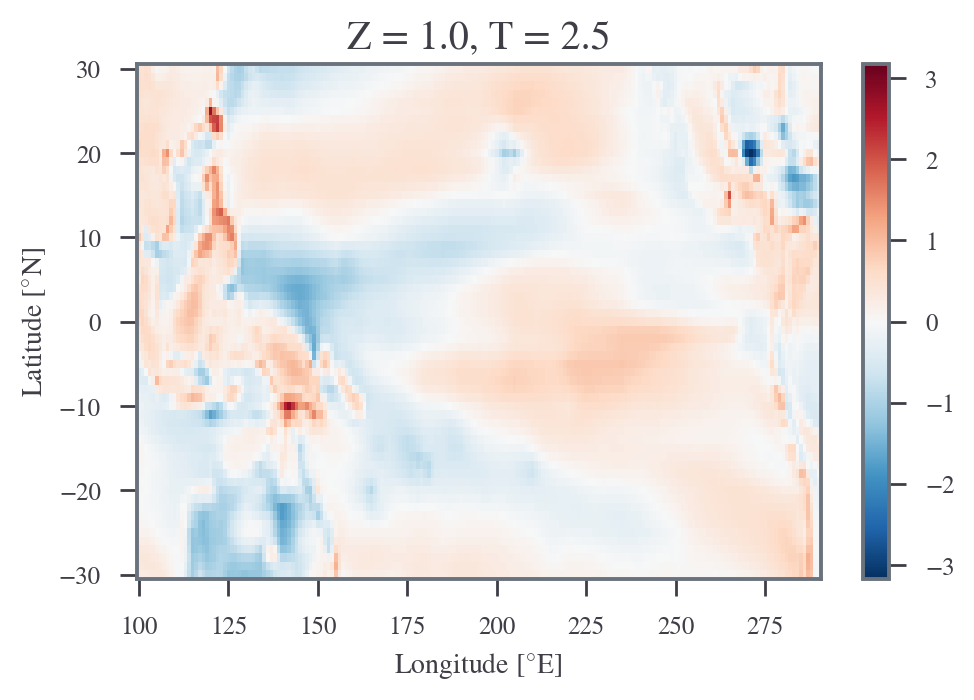

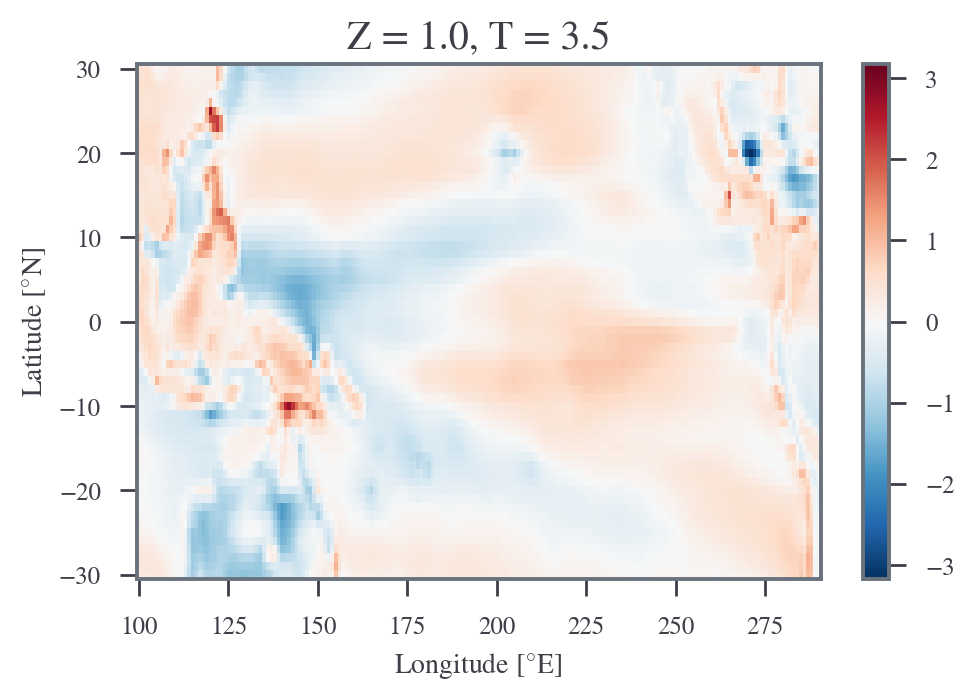

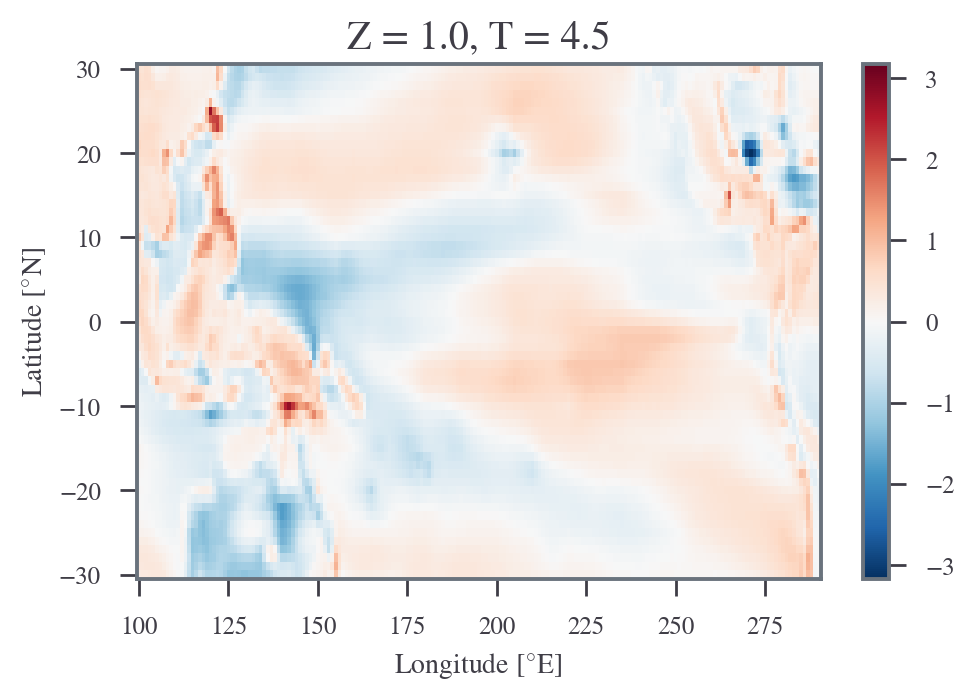

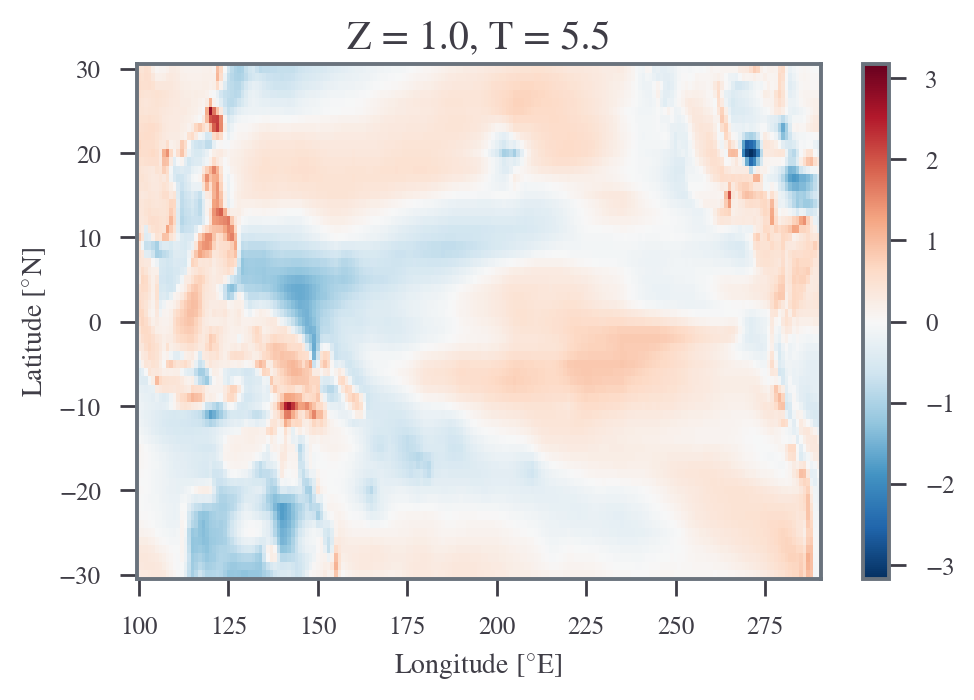

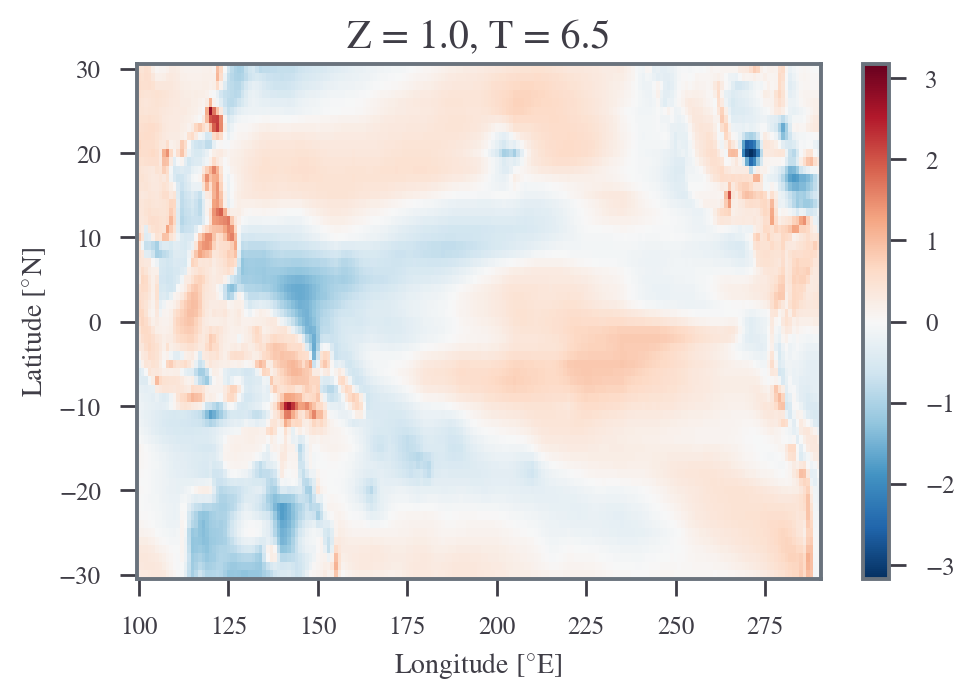

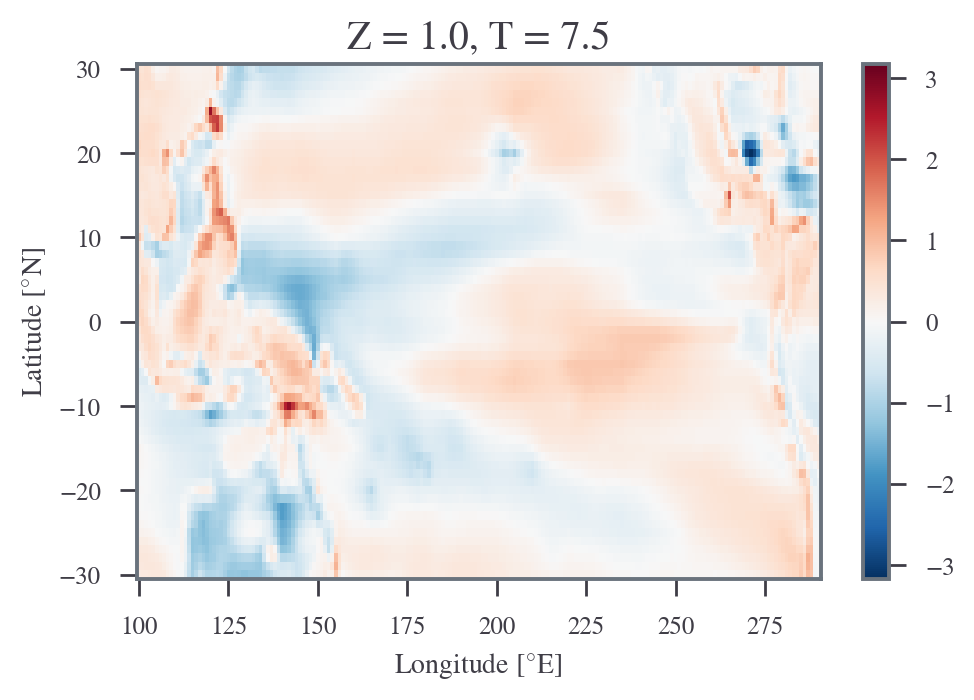

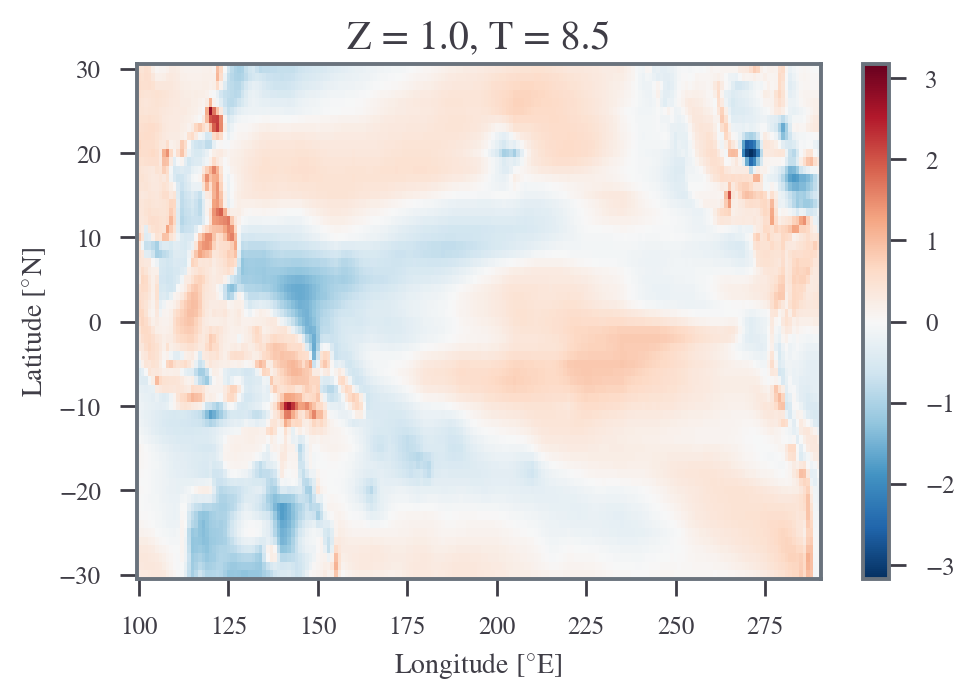

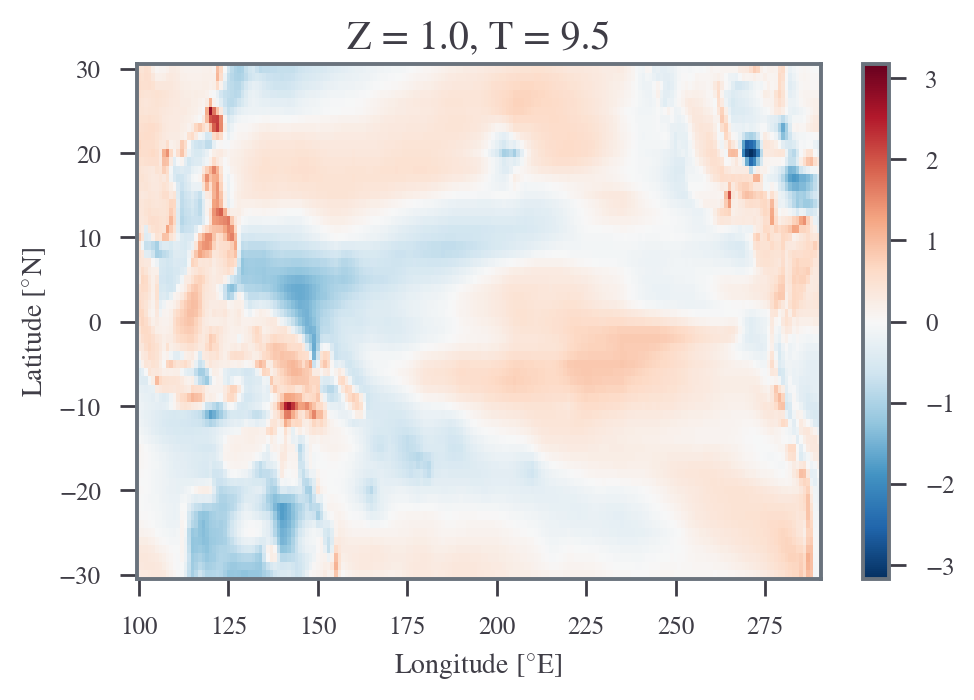

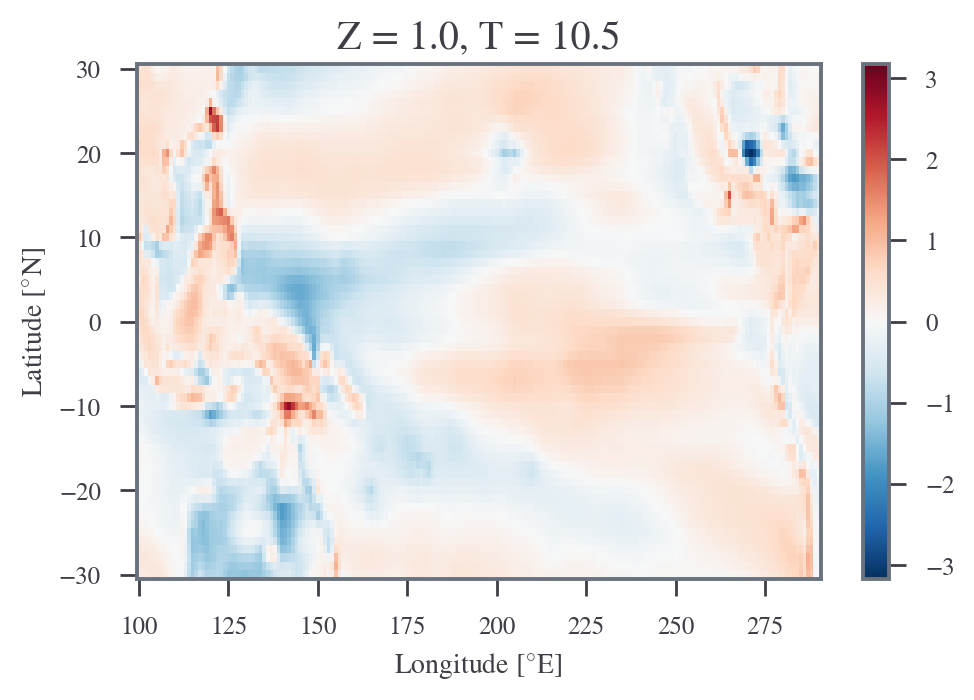

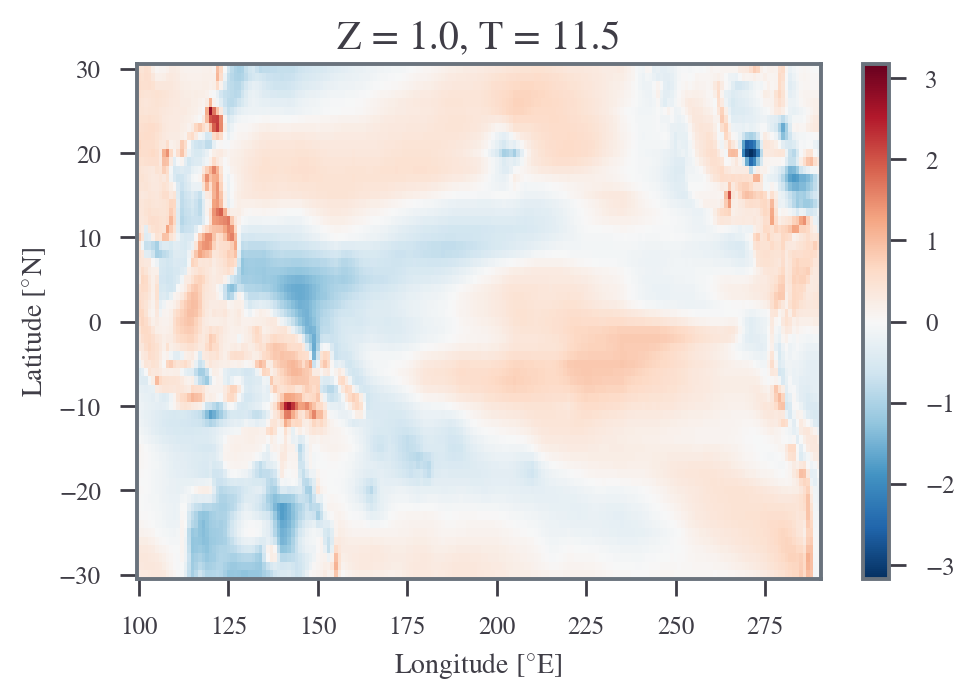

In [72]:
for i in range(12):
    add_units(sel(can_coords(open_dataset(os.path.join(setup.atmos_path, "dQ.nc"))).dq_dt)
    -sel(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    )).isel(T=i, Z=0)).plot()
    plt.show()

In [70]:
import matplotlib.pyplot as plt

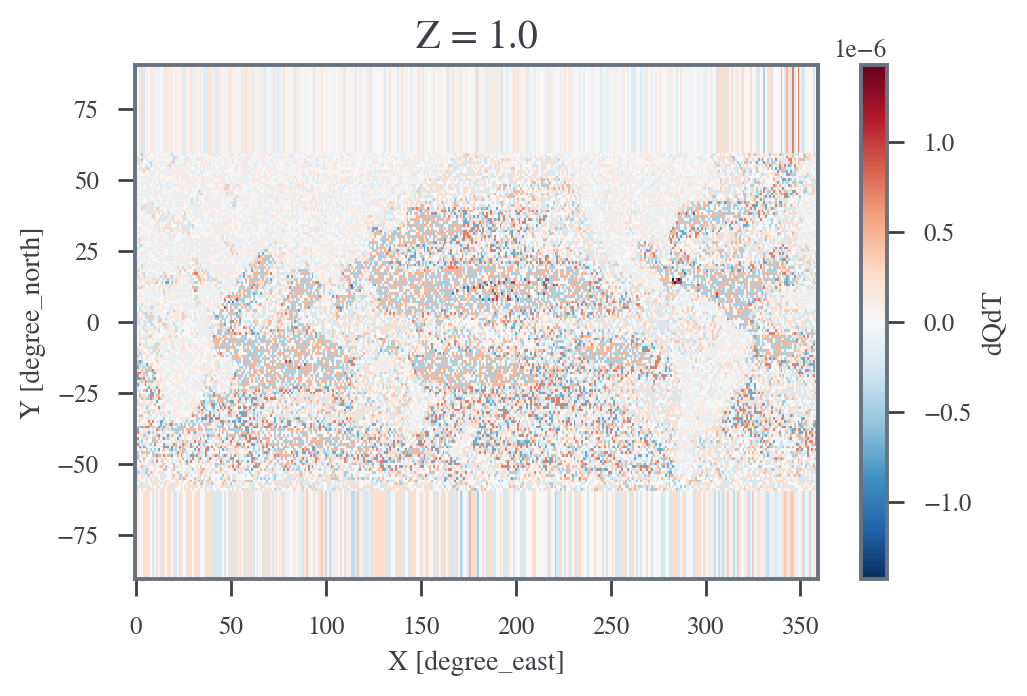

In [77]:
(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).isel(T=0).drop(["T", "Z"])
-
xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).mean("T")).plot()

In [78]:
import recursive_diff

In [ ]:
for x in recursive_diff.recursive_diff(xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).isel(T=0).isel(Z=0).drop(["T", "Z"]),
xr.open_dataarray(
        os.path.join(setup.ocean_data_path, "dQdT-sample.nc"), decode_times=False
    ).mean("T").isel(Z=0).drop(["Z"])):
    print(x)

[attrs]: Pair file_missing_value:-999 is in LHS only
[attrs]: Pair fnname:max is in LHS only
[attrs]: Pair long_name:dQdT is in LHS only
[attrs]: Pair longname:dQdT is in LHS only
[attrs]: Pair pointwidth:1.0 is in LHS only
[attrs]: Pair units:unitless is in LHS only
[data][X=0.0, Y=-1.0]: 2.336207628250122 != 2.336207866668701 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=0.0, Y=-10.0]: 3.2225005626678467 != 3.2225000858306885 (abs: -4.8e-07, rel: -1.5e-07)
[data][X=0.0, Y=-11.0]: 3.3200464248657227 != 3.3200457096099854 (abs: -7.2e-07, rel: -2.2e-07)
[data][X=0.0, Y=-12.0]: 3.4158735275268555 != 3.4158742427825928 (abs: 7.2e-07, rel: 2.1e-07)
[data][X=0.0, Y=-13.0]: 3.5198240280151367 != 3.519824743270874 (abs: 7.2e-07, rel: 2.0e-07)
[data][X=0.0, Y=-14.0]: 3.625638961791992 != 3.6256396770477295 (abs: 7.2e-07, rel: 2.0e-07)
[data][X=0.0, Y=-15.0]: 3.711228370666504 != 3.7112276554107666 (abs: -7.2e-07, rel: -1.9e-07)
[data][X=0.0, Y=-16.0]: 3.7605841159820557 != 3.760584592819214 (abs: 4.8e

[data][X=104.0, Y=-71.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-72.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-73.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-74.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-75.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-76.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-77.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-78.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-79.0]: 1.816601037979126 != 1.8166009187698364 (abs: -1.2e-07, rel: -6.6e-08)
[data][X=104.0, Y=-8.0]: 4.10127067565918 != 4.101271152496338 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=104.0, Y=-80.0]: 1.8166010

[data][X=111.0, Y=-67.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-68.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-69.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-7.0]: 1.8199429512023926 != 1.819942593574524 (abs: -3.6e-07, rel: -2.0e-07)
[data][X=111.0, Y=-70.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-71.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-72.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-73.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-74.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-75.0]: 1.916918396949768 != 1.9169182777404785 (abs: -1.2e-07, rel: -6.2e-08)
[data][X=111.0, Y=-76.0]: 1.916

[data][X=116.0, Y=31.0]: 1.1845943927764893 != 1.1845942735671997 (abs: -1.2e-07, rel: -1.0e-07)
[data][X=116.0, Y=32.0]: 1.1676223278045654 != 1.167622447013855 (abs: 1.2e-07, rel: 1.0e-07)
[data][X=116.0, Y=33.0]: 1.167319655418396 != 1.1673195362091064 (abs: -1.2e-07, rel: -1.0e-07)
[data][X=116.0, Y=34.0]: 1.1678024530410767 != 1.1678025722503662 (abs: 1.2e-07, rel: 1.0e-07)
[data][X=116.0, Y=35.0]: 1.1410467624664307 != 1.1410466432571411 (abs: -1.2e-07, rel: -1.0e-07)
[data][X=116.0, Y=36.0]: 1.0888408422470093 != 1.0888407230377197 (abs: -1.2e-07, rel: -1.1e-07)
[data][X=116.0, Y=37.0]: 1.0643649101257324 != 1.064365029335022 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=116.0, Y=38.0]: 1.0393354892730713 != 1.0393353700637817 (abs: -1.2e-07, rel: -1.1e-07)
[data][X=116.0, Y=39.0]: 1.0072157382965088 != 1.0072156190872192 (abs: -1.2e-07, rel: -1.2e-07)
[data][X=116.0, Y=4.0]: 1.878470778465271 != 1.8784708976745605 (abs: 1.2e-07, rel: 6.3e-08)
[data][X=116.0, Y=40.0]: 0.9751368761062622

[data][X=122.0, Y=-80.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-81.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-82.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-83.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-84.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-85.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-86.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-87.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-88.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-89.0]: 2.029252529144287 != 2.029252767562866 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=122.0, Y=-9.0]: 1.7594053745269775 != 1.75940525531

[data][X=129.0, Y=40.0]: 1.1092727184295654 != 1.109272837638855 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=129.0, Y=41.0]: 1.0245327949523926 != 1.024532675743103 (abs: -1.2e-07, rel: -1.2e-07)
[data][X=129.0, Y=42.0]: 0.9790140390396118 != 0.9790140986442566 (abs: 6.0e-08, rel: 6.1e-08)
[data][X=129.0, Y=43.0]: 0.9489381313323975 != 0.9489383101463318 (abs: 1.8e-07, rel: 1.9e-07)
[data][X=129.0, Y=44.0]: 0.9320958256721497 != 0.9320957660675049 (abs: -6.0e-08, rel: -6.4e-08)
[data][X=129.0, Y=46.0]: 0.9273630380630493 != 0.9273630976676941 (abs: 6.0e-08, rel: 6.4e-08)
[data][X=129.0, Y=47.0]: 0.922653079032898 != 0.9226531386375427 (abs: 6.0e-08, rel: 6.5e-08)
[data][X=129.0, Y=48.0]: 0.9162144064903259 != 0.9162142872810364 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=129.0, Y=49.0]: 0.9073547124862671 != 0.9073546528816223 (abs: -6.0e-08, rel: -6.6e-08)
[data][X=129.0, Y=50.0]: 0.8959041237831116 != 0.8959042429924011 (abs: 1.2e-07, rel: 1.3e-07)
[data][X=129.0, Y=51.0]: 0.8907864689826965 !

[data][X=136.0, Y=-36.0]: 2.917780876159668 != 2.917781114578247 (abs: 2.4e-07, rel: 8.2e-08)
[data][X=136.0, Y=-38.0]: 3.206916093826294 != 3.206916570663452 (abs: 4.8e-07, rel: 1.5e-07)
[data][X=136.0, Y=-39.0]: 3.27070951461792 != 3.270709753036499 (abs: 2.4e-07, rel: 7.3e-08)
[data][X=136.0, Y=-4.0]: 2.0314340591430664 != 2.0314338207244873 (abs: -2.4e-07, rel: -1.2e-07)
[data][X=136.0, Y=-40.0]: 3.3527777194976807 != 3.352778196334839 (abs: 4.8e-07, rel: 1.4e-07)
[data][X=136.0, Y=-41.0]: 3.4509739875793457 != 3.4509737491607666 (abs: -2.4e-07, rel: -6.9e-08)
[data][X=136.0, Y=-42.0]: 3.5576295852661133 != 3.557628870010376 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=136.0, Y=-43.0]: 3.667654037475586 != 3.6676547527313232 (abs: 7.2e-07, rel: 2.0e-07)
[data][X=136.0, Y=-44.0]: 3.752110481262207 != 3.7521097660064697 (abs: -7.2e-07, rel: -1.9e-07)
[data][X=136.0, Y=-45.0]: 3.7901082038879395 != 3.7901079654693604 (abs: -2.4e-07, rel: -6.3e-08)
[data][X=136.0, Y=-46.0]: 3.76772928237915

[data][X=141.0, Y=83.0]: 0.8537994623184204 != 0.8537995219230652 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=141.0, Y=84.0]: 0.8537994623184204 != 0.8537995219230652 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=141.0, Y=85.0]: 0.8537994623184204 != 0.8537995219230652 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=141.0, Y=86.0]: 0.8537994623184204 != 0.8537995219230652 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=141.0, Y=87.0]: 0.8537994623184204 != 0.8537995219230652 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=141.0, Y=88.0]: 0.8537994623184204 != 0.8537995219230652 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=141.0, Y=89.0]: 0.8537994623184204 != 0.8537995219230652 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=141.0, Y=90.0]: 0.8537994623184204 != 0.8537995219230652 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=142.0, Y=-10.0]: 1.8860089778900146 != 1.8860090970993042 (abs: 1.2e-07, rel: 6.3e-08)
[data][X=142.0, Y=-11.0]: 1.8443796634674072 != 1.8443795442581177 (abs: -1.2e-07, rel: -6.5e-08)
[data][X=142.0, Y=-12.0]: 1.5050671100616455 !

[data][X=15.0, Y=18.0]: 1.2733514308929443 != 1.2733515501022339 (abs: 1.2e-07, rel: 9.4e-08)
[data][X=15.0, Y=20.0]: 1.21602463722229 != 1.2160245180130005 (abs: -1.2e-07, rel: -9.8e-08)
[data][X=15.0, Y=22.0]: 1.2497341632843018 != 1.2497340440750122 (abs: -1.2e-07, rel: -9.5e-08)
[data][X=15.0, Y=24.0]: 1.267770528793335 != 1.2677706480026245 (abs: 1.2e-07, rel: 9.4e-08)
[data][X=15.0, Y=25.0]: 1.1865160465240479 != 1.1865159273147583 (abs: -1.2e-07, rel: -1.0e-07)
[data][X=15.0, Y=26.0]: 1.1872527599334717 != 1.1872528791427612 (abs: 1.2e-07, rel: 1.0e-07)
[data][X=15.0, Y=27.0]: 1.1664316654205322 != 1.1664315462112427 (abs: -1.2e-07, rel: -1.0e-07)
[data][X=15.0, Y=28.0]: 1.1577022075653076 != 1.1577023267745972 (abs: 1.2e-07, rel: 1.0e-07)
[data][X=15.0, Y=29.0]: 1.2049486637115479 != 1.2049485445022583 (abs: -1.2e-07, rel: -9.9e-08)
[data][X=15.0, Y=32.0]: 1.8568428754806519 != 1.8568426370620728 (abs: -2.4e-07, rel: -1.3e-07)
[data][X=15.0, Y=33.0]: 2.291600227355957 != 2.2915

[data][X=155.0, Y=-16.0]: 4.483139991760254 != 4.483139514923096 (abs: -4.8e-07, rel: -1.1e-07)
[data][X=155.0, Y=-17.0]: 4.430912971496582 != 4.430912494659424 (abs: -4.8e-07, rel: -1.1e-07)
[data][X=155.0, Y=-19.0]: 4.210062026977539 != 4.210061550140381 (abs: -4.8e-07, rel: -1.1e-07)
[data][X=155.0, Y=-21.0]: 3.9545600414276123 != 3.954559564590454 (abs: -4.8e-07, rel: -1.2e-07)
[data][X=155.0, Y=-22.0]: 3.830155849456787 != 3.830155611038208 (abs: -2.4e-07, rel: -6.2e-08)
[data][X=155.0, Y=-24.0]: 3.657038688659668 != 3.6570394039154053 (abs: 7.2e-07, rel: 2.0e-07)
[data][X=155.0, Y=-25.0]: 3.57545804977417 != 3.575458288192749 (abs: 2.4e-07, rel: 6.7e-08)
[data][X=155.0, Y=-26.0]: 3.425856113433838 != 3.425856351852417 (abs: 2.4e-07, rel: 7.0e-08)
[data][X=155.0, Y=-29.0]: 2.5819406509399414 != 2.5819404125213623 (abs: -2.4e-07, rel: -9.2e-08)
[data][X=155.0, Y=-30.0]: 2.8103301525115967 != 2.8103296756744385 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=155.0, Y=-32.0]: 3.9309115409851

[data][X=162.0, Y=-75.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-76.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-77.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-78.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-79.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-8.0]: 3.6739518642425537 != 3.6739513874053955 (abs: -4.8e-07, rel: -1.3e-07)
[data][X=162.0, Y=-80.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-81.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-82.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-83.0]: 2.2988808155059814 != 2.2988810539245605 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=162.0, Y=-84.0]: 2.29888081550

[data][X=169.0, Y=19.0]: 3.961636543273926 != 3.9616358280181885 (abs: -7.2e-07, rel: -1.8e-07)
[data][X=169.0, Y=20.0]: 3.8355510234832764 != 3.8355512619018555 (abs: 2.4e-07, rel: 6.2e-08)
[data][X=169.0, Y=21.0]: 3.7183713912963867 != 3.718372106552124 (abs: 7.2e-07, rel: 1.9e-07)
[data][X=169.0, Y=22.0]: 3.6077933311462402 != 3.607793092727661 (abs: -2.4e-07, rel: -6.6e-08)
[data][X=169.0, Y=24.0]: 3.4868643283843994 != 3.4868648052215576 (abs: 4.8e-07, rel: 1.4e-07)
[data][X=169.0, Y=25.0]: 3.4695076942443848 != 3.469507932662964 (abs: 2.4e-07, rel: 6.9e-08)
[data][X=169.0, Y=26.0]: 3.4862427711486816 != 3.4862430095672607 (abs: 2.4e-07, rel: 6.8e-08)
[data][X=169.0, Y=27.0]: 3.548865795135498 != 3.548866033554077 (abs: 2.4e-07, rel: 6.7e-08)
[data][X=169.0, Y=28.0]: 3.6581897735595703 != 3.658189058303833 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=169.0, Y=29.0]: 3.7836575508117676 != 3.7836573123931885 (abs: -2.4e-07, rel: -6.3e-08)
[data][X=169.0, Y=30.0]: 3.8965816497802734 != 3.

[data][X=176.0, Y=-84.0]: 2.736229658126831 != 2.736229181289673 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=176.0, Y=-85.0]: 2.736229658126831 != 2.736229181289673 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=176.0, Y=-86.0]: 2.736229658126831 != 2.736229181289673 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=176.0, Y=-87.0]: 2.736229658126831 != 2.736229181289673 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=176.0, Y=-88.0]: 2.736229658126831 != 2.736229181289673 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=176.0, Y=-89.0]: 2.736229658126831 != 2.736229181289673 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=176.0, Y=-9.0]: 3.5563502311706543 != 3.5563504695892334 (abs: 2.4e-07, rel: 6.7e-08)
[data][X=176.0, Y=-90.0]: 2.736229658126831 != 2.736229181289673 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=176.0, Y=10.0]: 5.745363235473633 != 5.745362758636475 (abs: -4.8e-07, rel: -8.3e-08)
[data][X=176.0, Y=11.0]: 5.668797492980957 != 5.668797016143799 (abs: -4.8e-07, rel: -8.4e-08)
[data][X=176.0, Y=12.0]: 5.539971351623535 

[data][X=182.0, Y=31.0]: 3.598543167114258 != 3.5985424518585205 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=182.0, Y=33.0]: 3.7231593132019043 != 3.7231595516204834 (abs: 2.4e-07, rel: 6.4e-08)
[data][X=182.0, Y=34.0]: 3.74196720123291 != 3.741966485977173 (abs: -7.2e-07, rel: -1.9e-07)
[data][X=182.0, Y=35.0]: 3.718061923980713 != 3.718062162399292 (abs: 2.4e-07, rel: 6.4e-08)
[data][X=182.0, Y=36.0]: 3.6569011211395264 != 3.6569013595581055 (abs: 2.4e-07, rel: 6.5e-08)
[data][X=182.0, Y=37.0]: 3.584240674972534 != 3.584240198135376 (abs: -4.8e-07, rel: -1.3e-07)
[data][X=182.0, Y=38.0]: 3.4973597526550293 != 3.4973599910736084 (abs: 2.4e-07, rel: 6.8e-08)
[data][X=182.0, Y=39.0]: 3.395803689956665 != 3.3958041667938232 (abs: 4.8e-07, rel: 1.4e-07)
[data][X=182.0, Y=40.0]: 3.2736806869506836 != 3.273681402206421 (abs: 7.2e-07, rel: 2.2e-07)
[data][X=182.0, Y=41.0]: 3.134942054748535 != 3.134941816329956 (abs: -2.4e-07, rel: -7.6e-08)
[data][X=182.0, Y=42.0]: 2.999666690826416 != 2.999666

[data][X=189.0, Y=-67.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-68.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-69.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-70.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-71.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-72.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-73.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-74.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-75.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-76.0]: 2.617410182952881 != 2.61741042137146 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=189.0, Y=-77.0]: 2.617410182952881 != 2.61741042137146 (abs: 

[data][X=195.0, Y=56.0]: 1.3560069799423218 != 1.3560067415237427 (abs: -2.4e-07, rel: -1.8e-07)
[data][X=195.0, Y=57.0]: 1.629393458366394 != 1.629393219947815 (abs: -2.4e-07, rel: -1.5e-07)
[data][X=195.0, Y=58.0]: 1.5605778694152832 != 1.5605777502059937 (abs: -1.2e-07, rel: -7.6e-08)
[data][X=195.0, Y=6.0]: 4.741621494293213 != 4.741621971130371 (abs: 4.8e-07, rel: 1.0e-07)
[data][X=195.0, Y=60.0]: 1.2751538753509521 != 1.2751539945602417 (abs: 1.2e-07, rel: 9.3e-08)
[data][X=195.0, Y=61.0]: 1.2751538753509521 != 1.2751539945602417 (abs: 1.2e-07, rel: 9.3e-08)
[data][X=195.0, Y=62.0]: 1.2751538753509521 != 1.2751539945602417 (abs: 1.2e-07, rel: 9.3e-08)
[data][X=195.0, Y=63.0]: 1.2751538753509521 != 1.2751539945602417 (abs: 1.2e-07, rel: 9.3e-08)
[data][X=195.0, Y=64.0]: 1.2751538753509521 != 1.2751539945602417 (abs: 1.2e-07, rel: 9.3e-08)
[data][X=195.0, Y=65.0]: 1.2751538753509521 != 1.2751539945602417 (abs: 1.2e-07, rel: 9.3e-08)
[data][X=195.0, Y=66.0]: 1.2751538753509521 != 1.

[data][X=200.0, Y=-13.0]: 3.7476632595062256 != 3.7476627826690674 (abs: -4.8e-07, rel: -1.3e-07)
[data][X=200.0, Y=-14.0]: 3.8817429542541504 != 3.8817431926727295 (abs: 2.4e-07, rel: 6.1e-08)
[data][X=200.0, Y=-15.0]: 4.00049352645874 != 4.000493049621582 (abs: -4.8e-07, rel: -1.2e-07)
[data][X=200.0, Y=-16.0]: 4.1074538230896 != 4.107453346252441 (abs: -4.8e-07, rel: -1.2e-07)
[data][X=200.0, Y=-17.0]: 4.195653915405273 != 4.195654392242432 (abs: 4.8e-07, rel: 1.1e-07)
[data][X=200.0, Y=-18.0]: 4.2319159507751465 != 4.231915473937988 (abs: -4.8e-07, rel: -1.1e-07)
[data][X=200.0, Y=-19.0]: 4.213838577270508 != 4.21383810043335 (abs: -4.8e-07, rel: -1.1e-07)
[data][X=200.0, Y=-21.0]: 4.1066484451293945 != 4.106647968292236 (abs: -4.8e-07, rel: -1.2e-07)
[data][X=200.0, Y=-22.0]: 4.014638423919678 != 4.0146379470825195 (abs: -4.8e-07, rel: -1.2e-07)
[data][X=200.0, Y=-23.0]: 3.9160780906677246 != 3.9160778522491455 (abs: -2.4e-07, rel: -6.1e-08)
[data][X=200.0, Y=-24.0]: 3.83790421485

[data][X=209.0, Y=-67.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-68.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-69.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-70.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-71.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-72.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-73.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-74.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-75.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-76.0]: 2.2572638988494873 != 2.257263660430908 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=209.0, Y=-77.0]: 2.25

[data][X=217.0, Y=-22.0]: 3.9298179149627686 != 3.9298174381256104 (abs: -4.8e-07, rel: -1.2e-07)
[data][X=217.0, Y=-23.0]: 3.918318033218384 != 3.918318510055542 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=217.0, Y=-24.0]: 3.901153087615967 != 3.901153326034546 (abs: 2.4e-07, rel: 6.1e-08)
[data][X=217.0, Y=-25.0]: 3.8623909950256348 != 3.862391233444214 (abs: 2.4e-07, rel: 6.2e-08)
[data][X=217.0, Y=-26.0]: 3.8057241439819336 != 3.805724859237671 (abs: 7.2e-07, rel: 1.9e-07)
[data][X=217.0, Y=-27.0]: 3.752110481262207 != 3.7521097660064697 (abs: -7.2e-07, rel: -1.9e-07)
[data][X=217.0, Y=-28.0]: 3.709886074066162 != 3.709885835647583 (abs: -2.4e-07, rel: -6.4e-08)
[data][X=217.0, Y=-29.0]: 3.6557750701904297 != 3.655775785446167 (abs: 7.2e-07, rel: 2.0e-07)
[data][X=217.0, Y=-3.0]: 3.451256275177002 != 3.451256036758423 (abs: -2.4e-07, rel: -6.9e-08)
[data][X=217.0, Y=-30.0]: 3.592055320739746 != 3.5920560359954834 (abs: 7.2e-07, rel: 2.0e-07)
[data][X=217.0, Y=-32.0]: 3.491964817047119 !=

[data][X=224.0, Y=-59.0]: 2.789456605911255 != 2.789457082748413 (abs: 4.8e-07, rel: 1.7e-07)
[data][X=224.0, Y=-6.0]: 3.4314208030700684 != 3.4314205646514893 (abs: -2.4e-07, rel: -6.9e-08)
[data][X=224.0, Y=-60.0]: 2.6618850231170654 != 2.6618847846984863 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=224.0, Y=-61.0]: 2.6618850231170654 != 2.6618847846984863 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=224.0, Y=-62.0]: 2.6618850231170654 != 2.6618847846984863 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=224.0, Y=-63.0]: 2.6618850231170654 != 2.6618847846984863 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=224.0, Y=-64.0]: 2.6618850231170654 != 2.6618847846984863 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=224.0, Y=-65.0]: 2.6618850231170654 != 2.6618847846984863 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=224.0, Y=-66.0]: 2.6618850231170654 != 2.6618847846984863 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=224.0, Y=-67.0]: 2.6618850231170654 != 2.6618847846984863 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=224.0, Y=-68.0]:

[data][X=231.0, Y=-61.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-62.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-63.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-64.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-65.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-66.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-67.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-68.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-69.0]: 2.6543662548065186 != 2.6543660163879395 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=231.0, Y=-7.0]: 3.628880262374878 != 3.6288797855377197 (abs: -4.8e-07, rel: -1.3e-07)
[data][X=231.0, Y=-70.

[data][X=239.0, Y=-17.0]: 3.539801597595215 != 3.539802312850952 (abs: 7.2e-07, rel: 2.0e-07)
[data][X=239.0, Y=-2.0]: 2.6669297218322754 != 2.6669294834136963 (abs: -2.4e-07, rel: -8.9e-08)
[data][X=239.0, Y=-22.0]: 3.440373420715332 != 3.4403727054595947 (abs: -7.2e-07, rel: -2.1e-07)
[data][X=239.0, Y=-24.0]: 3.517266273498535 != 3.517265558242798 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=239.0, Y=-25.0]: 3.5491394996643066 != 3.5491397380828857 (abs: 2.4e-07, rel: 6.7e-08)
[data][X=239.0, Y=-26.0]: 3.560983657836914 != 3.5609829425811768 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=239.0, Y=-29.0]: 3.556680679321289 != 3.5566799640655518 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=239.0, Y=-30.0]: 3.539433479309082 != 3.5394327640533447 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=239.0, Y=-31.0]: 3.5165657997131348 != 3.516566038131714 (abs: 2.4e-07, rel: 6.8e-08)
[data][X=239.0, Y=-34.0]: 3.4426417350769043 != 3.4426419734954834 (abs: 2.4e-07, rel: 6.9e-08)
[data][X=239.0, Y=-36.0]: 3.4107089042

[data][X=246.0, Y=16.0]: 3.0415122509002686 != 3.0415117740631104 (abs: -4.8e-07, rel: -1.6e-07)
[data][X=246.0, Y=17.0]: 2.893472194671631 != 2.89347243309021 (abs: 2.4e-07, rel: 8.2e-08)
[data][X=246.0, Y=19.0]: 2.5781283378601074 != 2.5781285762786865 (abs: 2.4e-07, rel: 9.2e-08)
[data][X=246.0, Y=2.0]: 3.175593376159668 != 3.175593614578247 (abs: 2.4e-07, rel: 7.5e-08)
[data][X=246.0, Y=20.0]: 2.4430036544799805 != 2.4430038928985596 (abs: 2.4e-07, rel: 9.8e-08)
[data][X=246.0, Y=21.0]: 2.3395986557006836 != 2.3395988941192627 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=246.0, Y=22.0]: 2.2917397022247314 != 2.2917399406433105 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=246.0, Y=24.0]: 2.4045705795288086 != 2.4045708179473877 (abs: 2.4e-07, rel: 9.9e-08)
[data][X=246.0, Y=26.0]: 2.2383246421813965 != 2.2383248805999756 (abs: 2.4e-07, rel: 1.1e-07)
[data][X=246.0, Y=27.0]: 1.9709980487823486 != 1.9709981679916382 (abs: 1.2e-07, rel: 6.0e-08)
[data][X=246.0, Y=28.0]: 1.4638323783874512 != 1.46383

[data][X=251.0, Y=37.0]: 1.0020344257354736 != 1.002034306526184 (abs: -1.2e-07, rel: -1.2e-07)
[data][X=251.0, Y=38.0]: 0.9929441809654236 != 0.992944061756134 (abs: -1.2e-07, rel: -1.2e-07)
[data][X=251.0, Y=39.0]: 0.9819996356964111 != 0.9819994568824768 (abs: -1.8e-07, rel: -1.8e-07)
[data][X=251.0, Y=40.0]: 0.9740644693374634 != 0.9740645289421082 (abs: 6.0e-08, rel: 6.1e-08)
[data][X=251.0, Y=41.0]: 0.9696423411369324 != 0.9696424007415771 (abs: 6.0e-08, rel: 6.1e-08)
[data][X=251.0, Y=42.0]: 0.9592915773391724 != 0.9592915177345276 (abs: -6.0e-08, rel: -6.2e-08)
[data][X=251.0, Y=43.0]: 0.9519399404525757 != 0.9519398808479309 (abs: -6.0e-08, rel: -6.3e-08)
[data][X=251.0, Y=44.0]: 0.9491402506828308 != 0.9491403102874756 (abs: 6.0e-08, rel: 6.3e-08)
[data][X=251.0, Y=45.0]: 0.9500206112861633 != 0.9500207304954529 (abs: 1.2e-07, rel: 1.3e-07)
[data][X=251.0, Y=46.0]: 0.957305371761322 != 0.9573052525520325 (abs: -1.2e-07, rel: -1.2e-07)
[data][X=251.0, Y=47.0]: 0.96654355525970

[data][X=258.0, Y=-80.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-81.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-82.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-83.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-84.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-85.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-86.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-87.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-88.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-89.0]: 2.6501150131225586 != 2.6501152515411377 (abs: 2.4e-07, rel: 9.0e-08)
[data][X=258.0, Y=-9.0]: 4.1256537437438

[data][X=267.0, Y=-38.0]: 3.2853121757507324 != 3.2853124141693115 (abs: 2.4e-07, rel: 7.3e-08)
[data][X=267.0, Y=-39.0]: 3.334420919418335 != 3.3344204425811768 (abs: -4.8e-07, rel: -1.4e-07)
[data][X=267.0, Y=-4.0]: 2.7534377574920654 != 2.7534372806549072 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=267.0, Y=-41.0]: 3.38993501663208 != 3.389934778213501 (abs: -2.4e-07, rel: -7.0e-08)
[data][X=267.0, Y=-43.0]: 3.420300006866455 != 3.420299768447876 (abs: -2.4e-07, rel: -7.0e-08)
[data][X=267.0, Y=-44.0]: 3.4288201332092285 != 3.4288203716278076 (abs: 2.4e-07, rel: 7.0e-08)
[data][X=267.0, Y=-49.0]: 3.3615145683288574 != 3.3615148067474365 (abs: 2.4e-07, rel: 7.1e-08)
[data][X=267.0, Y=-5.0]: 3.07167911529541 != 3.071678876876831 (abs: -2.4e-07, rel: -7.8e-08)
[data][X=267.0, Y=-51.0]: 3.280848503112793 != 3.2808492183685303 (abs: 7.2e-07, rel: 2.2e-07)
[data][X=267.0, Y=-53.0]: 3.1914169788360596 != 3.1914174556732178 (abs: 4.8e-07, rel: 1.5e-07)
[data][X=267.0, Y=-55.0]: 3.05386877059936

[data][X=270.0, Y=19.0]: 3.3091282844543457 != 3.3091280460357666 (abs: -2.4e-07, rel: -7.2e-08)
[data][X=270.0, Y=2.0]: 2.6047966480255127 != 2.604796886444092 (abs: 2.4e-07, rel: 9.2e-08)
[data][X=270.0, Y=21.0]: 4.334717750549316 != 4.334717273712158 (abs: -4.8e-07, rel: -1.1e-07)
[data][X=270.0, Y=22.0]: 4.039481163024902 != 4.0394816398620605 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=270.0, Y=23.0]: 3.906525135040283 != 3.906524896621704 (abs: -2.4e-07, rel: -6.1e-08)
[data][X=270.0, Y=25.0]: 3.7280759811401367 != 3.728076696395874 (abs: 7.2e-07, rel: 1.9e-07)
[data][X=270.0, Y=27.0]: 3.334615468978882 != 3.3346149921417236 (abs: -4.8e-07, rel: -1.4e-07)
[data][X=270.0, Y=28.0]: 3.0975756645202637 != 3.0975759029388428 (abs: 2.4e-07, rel: 7.7e-08)
[data][X=270.0, Y=31.0]: 1.25296151638031 != 1.2529613971710205 (abs: -1.2e-07, rel: -9.5e-08)
[data][X=270.0, Y=34.0]: 1.1592917442321777 != 1.1592918634414673 (abs: 1.2e-07, rel: 1.0e-07)
[data][X=270.0, Y=35.0]: 1.1368625164031982 != 1.13

[data][X=28.0, Y=-27.0]: 1.0564830303192139 != 1.0564831495285034 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=28.0, Y=-29.0]: 1.0430980920791626 != 1.0430982112884521 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=28.0, Y=-30.0]: 1.0601840019226074 != 1.060184121131897 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=28.0, Y=-31.0]: 1.1430737972259521 != 1.1430739164352417 (abs: 1.2e-07, rel: 1.0e-07)
[data][X=28.0, Y=-34.0]: 3.0427708625793457 != 3.0427706241607666 (abs: -2.4e-07, rel: -7.8e-08)
[data][X=28.0, Y=-36.0]: 4.46217155456543 != 4.462172031402588 (abs: 4.8e-07, rel: 1.1e-07)
[data][X=28.0, Y=-38.0]: 4.308206081390381 != 4.308205604553223 (abs: -4.8e-07, rel: -1.1e-07)
[data][X=28.0, Y=-39.0]: 3.768648147583008 != 3.7686474323272705 (abs: -7.2e-07, rel: -1.9e-07)
[data][X=28.0, Y=-42.0]: 3.132931709289551 != 3.1329314708709717 (abs: -2.4e-07, rel: -7.6e-08)
[data][X=28.0, Y=-43.0]: 3.2287516593933105 != 3.2287518978118896 (abs: 2.4e-07, rel: 7.4e-08)
[data][X=28.0, Y=-44.0]: 3.2950167655944824 != 3.2

[data][X=287.0, Y=52.0]: 0.8788273334503174 != 0.8788271546363831 (abs: -1.8e-07, rel: -2.0e-07)
[data][X=287.0, Y=55.0]: 0.8395999670028687 != 0.8395999073982239 (abs: -6.0e-08, rel: -7.1e-08)
[data][X=287.0, Y=56.0]: 0.8487640619277954 != 0.8487641215324402 (abs: 6.0e-08, rel: 7.0e-08)
[data][X=287.0, Y=58.0]: 0.8361095786094666 != 0.836109459400177 (abs: -1.2e-07, rel: -1.4e-07)
[data][X=287.0, Y=59.0]: 0.8398559093475342 != 0.8398560881614685 (abs: 1.8e-07, rel: 2.1e-07)
[data][X=287.0, Y=6.0]: 1.619282603263855 != 1.6192823648452759 (abs: -2.4e-07, rel: -1.5e-07)
[data][X=287.0, Y=60.0]: 0.8627684116363525 != 0.8627682328224182 (abs: -1.8e-07, rel: -2.1e-07)
[data][X=287.0, Y=61.0]: 0.8627684116363525 != 0.8627682328224182 (abs: -1.8e-07, rel: -2.1e-07)
[data][X=287.0, Y=62.0]: 0.8627684116363525 != 0.8627682328224182 (abs: -1.8e-07, rel: -2.1e-07)
[data][X=287.0, Y=63.0]: 0.8627684116363525 != 0.8627682328224182 (abs: -1.8e-07, rel: -2.1e-07)
[data][X=287.0, Y=64.0]: 0.8627684116

[data][X=293.0, Y=20.0]: 3.8079330921173096 != 3.8079335689544678 (abs: 4.8e-07, rel: 1.3e-07)
[data][X=293.0, Y=21.0]: 3.5963127613067627 != 3.596313238143921 (abs: 4.8e-07, rel: 1.3e-07)
[data][X=293.0, Y=22.0]: 3.3729538917541504 != 3.3729541301727295 (abs: 2.4e-07, rel: 7.1e-08)
[data][X=293.0, Y=25.0]: 2.966015338897705 != 2.966015100479126 (abs: -2.4e-07, rel: -8.0e-08)
[data][X=293.0, Y=29.0]: 3.141968250274658 != 3.141968011856079 (abs: -2.4e-07, rel: -7.6e-08)
[data][X=293.0, Y=31.0]: 3.4559922218322754 != 3.4559924602508545 (abs: 2.4e-07, rel: 6.9e-08)
[data][X=293.0, Y=32.0]: 3.67972993850708 != 3.679729700088501 (abs: -2.4e-07, rel: -6.5e-08)
[data][X=293.0, Y=33.0]: 3.9559831619262695 != 3.9559824466705322 (abs: -7.2e-07, rel: -1.8e-07)
[data][X=293.0, Y=34.0]: 4.2915849685668945 != 4.291584491729736 (abs: -4.8e-07, rel: -1.1e-07)
[data][X=293.0, Y=36.0]: 5.0164594650268555 != 5.016459941864014 (abs: 4.8e-07, rel: 9.5e-08)
[data][X=293.0, Y=38.0]: 5.421280860900879 != 5.42

[data][X=3.0, Y=-53.0]: 2.791693687438965 != 2.791693925857544 (abs: 2.4e-07, rel: 8.5e-08)
[data][X=3.0, Y=-54.0]: 2.682213306427002 != 2.682213068008423 (abs: -2.4e-07, rel: -8.9e-08)
[data][X=3.0, Y=-55.0]: 2.547163486480713 != 2.547163248062134 (abs: -2.4e-07, rel: -9.4e-08)
[data][X=3.0, Y=-57.0]: 2.2975192070007324 != 2.2975194454193115 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=3.0, Y=-58.0]: 2.1710498332977295 != 2.1710495948791504 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=3.0, Y=-59.0]: 2.0591378211975098 != 2.0591375827789307 (abs: -2.4e-07, rel: -1.2e-07)
[data][X=3.0, Y=-6.0]: 2.507920503616333 != 2.507920742034912 (abs: 2.4e-07, rel: 9.5e-08)
[data][X=3.0, Y=1.0]: 2.088089942932129 != 2.08808970451355 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=3.0, Y=12.0]: 1.7366204261779785 != 1.7366200685501099 (abs: -3.6e-07, rel: -2.1e-07)
[data][X=3.0, Y=13.0]: 2.106092929840088 != 2.106092691421509 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=3.0, Y=15.0]: 2.0628840923309326 != 2.0628838539123535 

[data][X=308.0, Y=-34.0]: 2.8517909049987793 != 2.8517911434173584 (abs: 2.4e-07, rel: 8.4e-08)
[data][X=308.0, Y=-37.0]: 3.770158529281616 != 3.770158052444458 (abs: -4.8e-07, rel: -1.3e-07)
[data][X=308.0, Y=-38.0]: 3.8141026496887207 != 3.8141024112701416 (abs: -2.4e-07, rel: -6.3e-08)
[data][X=308.0, Y=-39.0]: 3.8490281105041504 != 3.8490283489227295 (abs: 2.4e-07, rel: 6.2e-08)
[data][X=308.0, Y=-4.0]: 1.6109936237335205 != 1.61099374294281 (abs: 1.2e-07, rel: 7.4e-08)
[data][X=308.0, Y=-40.0]: 3.8253262042999268 != 3.8253259658813477 (abs: -2.4e-07, rel: -6.2e-08)
[data][X=308.0, Y=-41.0]: 3.571465015411377 != 3.571464776992798 (abs: -2.4e-07, rel: -6.7e-08)
[data][X=308.0, Y=-42.0]: 3.090743064880371 != 3.09074330329895 (abs: 2.4e-07, rel: 7.7e-08)
[data][X=308.0, Y=-43.0]: 2.781660556793213 != 2.781660318374634 (abs: -2.4e-07, rel: -8.6e-08)
[data][X=308.0, Y=-44.0]: 2.7663416862487793 != 2.7663419246673584 (abs: 2.4e-07, rel: 8.6e-08)
[data][X=308.0, Y=-46.0]: 2.73822116851806

[data][X=312.0, Y=-88.0]: 1.86021089553833 != 1.8602105379104614 (abs: -3.6e-07, rel: -1.9e-07)
[data][X=312.0, Y=-89.0]: 1.86021089553833 != 1.8602105379104614 (abs: -3.6e-07, rel: -1.9e-07)
[data][X=312.0, Y=-9.0]: 1.5077755451202393 != 1.5077754259109497 (abs: -1.2e-07, rel: -7.9e-08)
[data][X=312.0, Y=-90.0]: 1.86021089553833 != 1.8602105379104614 (abs: -3.6e-07, rel: -1.9e-07)
[data][X=312.0, Y=0.0]: 2.622035264968872 != 2.622035503387451 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=312.0, Y=1.0]: 3.9991445541381836 != 3.999145269393921 (abs: 7.2e-07, rel: 1.8e-07)
[data][X=312.0, Y=10.0]: 5.152371406555176 != 5.152370929718018 (abs: -4.8e-07, rel: -9.3e-08)
[data][X=312.0, Y=11.0]: 5.112235069274902 != 5.1122355461120605 (abs: 4.8e-07, rel: 9.3e-08)
[data][X=312.0, Y=13.0]: 4.909018516540527 != 4.9090189933776855 (abs: 4.8e-07, rel: 9.7e-08)
[data][X=312.0, Y=14.0]: 4.734055519104004 != 4.734055042266846 (abs: -4.8e-07, rel: -1.0e-07)
[data][X=312.0, Y=15.0]: 4.516875267028809 != 4.5168

[data][X=318.0, Y=42.0]: 3.3247079849243164 != 3.324707269668579 (abs: -7.2e-07, rel: -2.2e-07)
[data][X=318.0, Y=43.0]: 3.020552635192871 != 3.02055287361145 (abs: 2.4e-07, rel: 7.9e-08)
[data][X=318.0, Y=45.0]: 2.6548104286193848 != 2.6548101902008057 (abs: -2.4e-07, rel: -9.0e-08)
[data][X=318.0, Y=47.0]: 2.619629383087158 != 2.619629144668579 (abs: -2.4e-07, rel: -9.1e-08)
[data][X=318.0, Y=48.0]: 2.6096980571746826 != 2.6096978187561035 (abs: -2.4e-07, rel: -9.1e-08)
[data][X=318.0, Y=49.0]: 2.606905698776245 != 2.606905460357666 (abs: -2.4e-07, rel: -9.1e-08)
[data][X=318.0, Y=5.0]: 4.278356552124023 != 4.278357028961182 (abs: 4.8e-07, rel: 1.1e-07)
[data][X=318.0, Y=50.0]: 2.625964403152466 != 2.625964641571045 (abs: 2.4e-07, rel: 9.1e-08)
[data][X=318.0, Y=51.0]: 2.6730103492736816 != 2.6730101108551025 (abs: -2.4e-07, rel: -8.9e-08)
[data][X=318.0, Y=52.0]: 2.6985459327697754 != 2.6985456943511963 (abs: -2.4e-07, rel: -8.8e-08)
[data][X=318.0, Y=54.0]: 2.700867176055908 != 2.7

[data][X=326.0, Y=-29.0]: 3.596571207046509 != 3.596571683883667 (abs: 4.8e-07, rel: 1.3e-07)
[data][X=326.0, Y=-3.0]: 4.025579452514648 != 4.025579929351807 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=326.0, Y=-30.0]: 3.5840883255004883 != 3.584087610244751 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=326.0, Y=-31.0]: 3.5745410919189453 != 3.574540376663208 (abs: -7.2e-07, rel: -2.0e-07)
[data][X=326.0, Y=-32.0]: 3.57785701751709 != 3.577857732772827 (abs: 7.2e-07, rel: 2.0e-07)
[data][X=326.0, Y=-34.0]: 3.620039463043213 != 3.620039701461792 (abs: 2.4e-07, rel: 6.6e-08)
[data][X=326.0, Y=-35.0]: 3.6590607166290283 != 3.6590611934661865 (abs: 4.8e-07, rel: 1.3e-07)
[data][X=326.0, Y=-36.0]: 3.7040820121765137 != 3.7040822505950928 (abs: 2.4e-07, rel: 6.4e-08)
[data][X=326.0, Y=-37.0]: 3.725193977355957 != 3.7251932621002197 (abs: -7.2e-07, rel: -1.9e-07)
[data][X=326.0, Y=-38.0]: 3.7003014087677 != 3.7003018856048584 (abs: 4.8e-07, rel: 1.3e-07)
[data][X=326.0, Y=-39.0]: 3.617182970046997 != 3.6

[data][X=332.0, Y=-15.0]: 3.444523811340332 != 3.4445230960845947 (abs: -7.2e-07, rel: -2.1e-07)
[data][X=332.0, Y=-16.0]: 3.2807908058166504 != 3.2807910442352295 (abs: 2.4e-07, rel: 7.3e-08)
[data][X=332.0, Y=-17.0]: 3.1340041160583496 != 3.1340043544769287 (abs: 2.4e-07, rel: 7.6e-08)
[data][X=332.0, Y=-18.0]: 3.0150980949401855 != 3.0150983333587646 (abs: 2.4e-07, rel: 7.9e-08)
[data][X=332.0, Y=-23.0]: 2.9472270011901855 != 2.9472272396087646 (abs: 2.4e-07, rel: 8.1e-08)
[data][X=332.0, Y=-24.0]: 3.010969638824463 != 3.010969400405884 (abs: -2.4e-07, rel: -7.9e-08)
[data][X=332.0, Y=-25.0]: 3.086106300354004 != 3.086106061935425 (abs: -2.4e-07, rel: -7.7e-08)
[data][X=332.0, Y=-26.0]: 3.1561732292175293 != 3.1561734676361084 (abs: 2.4e-07, rel: 7.6e-08)
[data][X=332.0, Y=-27.0]: 3.2241768836975098 != 3.224177122116089 (abs: 2.4e-07, rel: 7.4e-08)
[data][X=332.0, Y=-28.0]: 3.2941012382507324 != 3.2941014766693115 (abs: 2.4e-07, rel: 7.2e-08)
[data][X=332.0, Y=-3.0]: 3.3663413524627

[data][X=340.0, Y=25.0]: 3.6265008449554443 != 3.626500368118286 (abs: -4.8e-07, rel: -1.3e-07)
[data][X=340.0, Y=26.0]: 3.429945945739746 != 3.4299466609954834 (abs: 7.2e-07, rel: 2.1e-07)
[data][X=340.0, Y=27.0]: 3.2489590644836426 != 3.2489588260650635 (abs: -2.4e-07, rel: -7.3e-08)
[data][X=340.0, Y=28.0]: 3.1105198860168457 != 3.1105196475982666 (abs: -2.4e-07, rel: -7.7e-08)
[data][X=340.0, Y=29.0]: 3.0046305656433105 != 3.0046308040618896 (abs: 2.4e-07, rel: 7.9e-08)
[data][X=340.0, Y=3.0]: 2.3300185203552246 != 2.3300187587738037 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=340.0, Y=32.0]: 2.7792863845825195 != 2.7792861461639404 (abs: -2.4e-07, rel: -8.6e-08)
[data][X=340.0, Y=33.0]: 2.7633180618286133 != 2.763317823410034 (abs: -2.4e-07, rel: -8.6e-08)
[data][X=340.0, Y=34.0]: 2.797729015350342 != 2.797729253768921 (abs: 2.4e-07, rel: 8.5e-08)
[data][X=340.0, Y=37.0]: 3.045292854309082 != 3.045292615890503 (abs: -2.4e-07, rel: -7.8e-08)
[data][X=340.0, Y=39.0]: 3.1361441612243652 !=

[data][X=35.0, Y=-33.0]: 3.6595921516418457 != 3.6595919132232666 (abs: -2.4e-07, rel: -6.5e-08)
[data][X=35.0, Y=-34.0]: 3.8387327194213867 != 3.838733434677124 (abs: 7.2e-07, rel: 1.9e-07)
[data][X=35.0, Y=-35.0]: 4.071894645690918 != 4.071895122528076 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=35.0, Y=-38.0]: 4.240697860717773 != 4.240698337554932 (abs: 4.8e-07, rel: 1.1e-07)
[data][X=35.0, Y=-39.0]: 3.881227970123291 != 3.88122820854187 (abs: 2.4e-07, rel: 6.1e-08)
[data][X=35.0, Y=-4.0]: 1.285526990890503 != 1.2855271100997925 (abs: 1.2e-07, rel: 9.3e-08)
[data][X=35.0, Y=-40.0]: 3.4024176597595215 != 3.4024174213409424 (abs: -2.4e-07, rel: -7.0e-08)
[data][X=35.0, Y=-42.0]: 3.2380805015563965 != 3.2380802631378174 (abs: -2.4e-07, rel: -7.4e-08)
[data][X=35.0, Y=-43.0]: 3.244086742401123 != 3.244086980819702 (abs: 2.4e-07, rel: 7.3e-08)
[data][X=35.0, Y=-45.0]: 3.215938091278076 != 3.2159383296966553 (abs: 2.4e-07, rel: 7.4e-08)
[data][X=35.0, Y=-46.0]: 3.243133068084717 != 3.243133306

[data][X=355.0, Y=50.0]: 2.4951679706573486 != 2.4951682090759277 (abs: 2.4e-07, rel: 9.6e-08)
[data][X=355.0, Y=51.0]: 2.042922019958496 != 2.042922258377075 (abs: 2.4e-07, rel: 1.2e-07)
[data][X=355.0, Y=52.0]: 1.4461519718170166 != 1.446151852607727 (abs: -1.2e-07, rel: -8.2e-08)
[data][X=355.0, Y=53.0]: 1.1032311916351318 != 1.1032313108444214 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=355.0, Y=55.0]: 1.0859953165054321 != 1.0859954357147217 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=355.0, Y=56.0]: 1.1133781671524048 != 1.1133782863616943 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=355.0, Y=57.0]: 1.2942320108413696 != 1.2942321300506592 (abs: 1.2e-07, rel: 9.2e-08)
[data][X=355.0, Y=58.0]: 1.635546088218689 != 1.6355458498001099 (abs: -2.4e-07, rel: -1.5e-07)
[data][X=355.0, Y=59.0]: 2.441032886505127 != 2.441032648086548 (abs: -2.4e-07, rel: -9.8e-08)
[data][X=355.0, Y=6.0]: 1.4731709957122803 != 1.4731711149215698 (abs: 1.2e-07, rel: 8.1e-08)
[data][X=355.0, Y=7.0]: 1.4478144645690918 != 1.447

[data][X=4.0, Y=3.0]: 1.8748502731323242 != 1.8748506307601929 (abs: 3.6e-07, rel: 1.9e-07)
[data][X=4.0, Y=30.0]: 1.4697537422180176 != 1.469753623008728 (abs: -1.2e-07, rel: -8.1e-08)
[data][X=4.0, Y=31.0]: 1.3444514274597168 != 1.3444515466690063 (abs: 1.2e-07, rel: 8.9e-08)
[data][X=4.0, Y=32.0]: 1.3049428462982178 != 1.3049429655075073 (abs: 1.2e-07, rel: 9.1e-08)
[data][X=4.0, Y=34.0]: 1.078295111656189 != 1.0782949924468994 (abs: -1.2e-07, rel: -1.1e-07)
[data][X=4.0, Y=35.0]: 1.085723638534546 != 1.0857237577438354 (abs: 1.2e-07, rel: 1.1e-07)
[data][X=4.0, Y=36.0]: 1.1281341314315796 != 1.12813401222229 (abs: -1.2e-07, rel: -1.1e-07)
[data][X=4.0, Y=37.0]: 1.5089137554168701 != 1.5089138746261597 (abs: 1.2e-07, rel: 7.9e-08)
[data][X=4.0, Y=38.0]: 2.193681240081787 != 2.193681478500366 (abs: 2.4e-07, rel: 1.1e-07)
[data][X=4.0, Y=40.0]: 2.120110034942627 != 2.120109796524048 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=4.0, Y=41.0]: 1.8314051628112793 != 1.831405520439148 (abs: 3.6

[data][X=45.0, Y=8.0]: 2.7790818214416504 != 2.7790815830230713 (abs: -2.4e-07, rel: -8.6e-08)
[data][X=45.0, Y=80.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=81.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=82.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=83.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=84.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=85.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=86.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=87.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=88.0]: 0.936492383480072 != 0.9364922642707825 (abs: -1.2e-07, rel: -1.3e-07)
[data][X=45.0, Y=89.0]: 0.936492383480072 != 0.936

[data][X=52.0, Y=-44.0]: 3.219799757003784 != 3.219799280166626 (abs: -4.8e-07, rel: -1.5e-07)
[data][X=52.0, Y=-45.0]: 3.1298108100891113 != 3.1298105716705322 (abs: -2.4e-07, rel: -7.6e-08)
[data][X=52.0, Y=-46.0]: 3.171999454498291 != 3.171999216079712 (abs: -2.4e-07, rel: -7.5e-08)
[data][X=52.0, Y=-47.0]: 3.2173871994018555 != 3.2173879146575928 (abs: 7.2e-07, rel: 2.2e-07)
[data][X=52.0, Y=-5.0]: 3.8813061714172363 != 3.8813059329986572 (abs: -2.4e-07, rel: -6.1e-08)
[data][X=52.0, Y=-52.0]: 3.22249698638916 != 3.222496271133423 (abs: -7.2e-07, rel: -2.2e-07)
[data][X=52.0, Y=-54.0]: 3.014216423034668 != 3.014216661453247 (abs: 2.4e-07, rel: 7.9e-08)
[data][X=52.0, Y=-55.0]: 2.914529323577881 != 2.91452956199646 (abs: 2.4e-07, rel: 8.2e-08)
[data][X=52.0, Y=-56.0]: 2.807581663131714 != 2.8075811862945557 (abs: -4.8e-07, rel: -1.7e-07)
[data][X=52.0, Y=-57.0]: 2.686591148376465 != 2.686591386795044 (abs: 2.4e-07, rel: 8.9e-08)
[data][X=52.0, Y=-6.0]: 4.0792131423950195 != 4.079212

[data][X=6.0, Y=-47.0]: 3.1403510570526123 != 3.140350580215454 (abs: -4.8e-07, rel: -1.5e-07)
[data][X=6.0, Y=-5.0]: 2.0159080028533936 != 2.0159077644348145 (abs: -2.4e-07, rel: -1.2e-07)
[data][X=6.0, Y=-51.0]: 2.9113683700561523 != 2.9113686084747314 (abs: 2.4e-07, rel: 8.2e-08)
[data][X=6.0, Y=-52.0]: 2.890406847000122 != 2.8904073238372803 (abs: 4.8e-07, rel: 1.6e-07)
[data][X=6.0, Y=-53.0]: 2.8133862018585205 != 2.8133866786956787 (abs: 4.8e-07, rel: 1.7e-07)
[data][X=6.0, Y=-54.0]: 2.6751341819763184 != 2.6751344203948975 (abs: 2.4e-07, rel: 8.9e-08)
[data][X=6.0, Y=-55.0]: 2.5105271339416504 != 2.5105268955230713 (abs: -2.4e-07, rel: -9.5e-08)
[data][X=6.0, Y=-56.0]: 2.369055986404419 != 2.369056224822998 (abs: 2.4e-07, rel: 1.0e-07)
[data][X=6.0, Y=-57.0]: 2.2416977882385254 != 2.2416975498199463 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=6.0, Y=-58.0]: 2.144524097442627 != 2.144523859024048 (abs: -2.4e-07, rel: -1.1e-07)
[data][X=6.0, Y=-59.0]: 2.076918840408325 != 2.0769190788

[data][X=66.0, Y=19.0]: 4.101325035095215 != 4.101325511932373 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=66.0, Y=2.0]: 2.340592384338379 != 2.3405921459198 (abs: -2.4e-07, rel: -1.0e-07)
[data][X=66.0, Y=20.0]: 4.086156845092773 != 4.086157321929932 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=66.0, Y=21.0]: 4.0278825759887695 != 4.027882099151611 (abs: -4.8e-07, rel: -1.2e-07)
[data][X=66.0, Y=22.0]: 3.865880250930786 != 3.865880012512207 (abs: -2.4e-07, rel: -6.2e-08)
[data][X=66.0, Y=23.0]: 3.5534913539886475 != 3.5534908771514893 (abs: -4.8e-07, rel: -1.3e-07)
[data][X=66.0, Y=25.0]: 2.404616355895996 != 2.404616594314575 (abs: 2.4e-07, rel: 9.9e-08)
[data][X=66.0, Y=26.0]: 1.3697741031646729 != 1.3697739839553833 (abs: -1.2e-07, rel: -8.7e-08)
[data][X=66.0, Y=27.0]: 1.3225882053375244 != 1.3225880861282349 (abs: -1.2e-07, rel: -9.0e-08)
[data][X=66.0, Y=28.0]: 1.2430262565612793 != 1.2430263757705688 (abs: 1.2e-07, rel: 9.6e-08)
[data][X=66.0, Y=29.0]: 1.15999436378479 != 1.1599942445755005

[data][X=74.0, Y=-16.0]: 5.259515762329102 != 5.259515285491943 (abs: -4.8e-07, rel: -9.1e-08)
[data][X=74.0, Y=-18.0]: 5.077043533325195 != 5.077043056488037 (abs: -4.8e-07, rel: -9.4e-08)
[data][X=74.0, Y=-2.0]: 3.198474407196045 != 3.198474645614624 (abs: 2.4e-07, rel: 7.5e-08)
[data][X=74.0, Y=-20.0]: 4.735574722290039 != 4.735574245452881 (abs: -4.8e-07, rel: -1.0e-07)
[data][X=74.0, Y=-23.0]: 4.081884384155273 != 4.081884860992432 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=74.0, Y=-24.0]: 3.8468430042266846 != 3.8468434810638428 (abs: 4.8e-07, rel: 1.2e-07)
[data][X=74.0, Y=-25.0]: 3.6237213611602783 != 3.6237218379974365 (abs: 4.8e-07, rel: 1.3e-07)
[data][X=74.0, Y=-27.0]: 3.2524266242980957 != 3.2524263858795166 (abs: -2.4e-07, rel: -7.3e-08)
[data][X=74.0, Y=-29.0]: 3.088913917541504 != 3.088913679122925 (abs: -2.4e-07, rel: -7.7e-08)
[data][X=74.0, Y=-30.0]: 3.068356990814209 != 3.068357229232788 (abs: 2.4e-07, rel: 7.8e-08)
[data][X=74.0, Y=-32.0]: 3.09913969039917 != 3.09913992